In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context

sc.set_figure_params(dpi=100, color_map = 'viridis_r', transparent=False, frameon=False)
sc.settings.verbosity = 1
sc.logging.print_header()

%config InlineBackend.figure_format = 'retina'

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

c:\Users\cpres\.conda\envs\Scanpy\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\cpres\.conda\envs\Scanpy\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\cpres\.conda\envs\Scanpy\lib\site-packages\umap\distances.py:1086: NumbaDeprecationWa

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.22.0 scipy==1.11.1 pandas==2.0.3 scikit-learn==1.3.0 statsmodels==0.14.0 python-igraph==0.10.8 louvain==0.8.1 pynndescent==0.5.10


c:\Users\cpres\.conda\envs\Scanpy\lib\site-packages\umap\umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


# Fast I/O

In [2]:
adata_adj = sc.read('Integration data/adata_all_muscle.h5ad') 
adata_adj

AnnData object with n_obs × n_vars = 1221 × 9231
    obs: 'Data_source', 'Geo_accession', 'Author_Date', 'PMID', 'Gsm_accession', 'Casual_gene', 'Phenotype_1', 'Phenotype_2', 'Biopsy', 'Tissue', 'Method', 'Platform', 'Sex', 'Age_range', 'Phenotype_3', 'Phenotype_4', 'Phenotype_5'
    uns: 'Data_source_colors', 'Geo_accession_colors', 'Method_colors', 'Phenotype_1_colors', 'Phenotype_2_colors', 'Phenotype_3_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'combatseq_tmm', 'edgeR', 'raw_count'
    obsp: 'connectivities', 'distances'

In [150]:
adata_adj.write('Integration data/adata_all_muscle.h5ad')

In [5]:
adata_adj.obs.to_excel("Meta/adata_adj.obs.xlsx", index=True, index_label='Sample_id') 

# Import integration data

In [2]:
adata_adj = sc.read_csv("Integration data/All_muscle_H_combatseq_tmm.csv", first_column_names='Sample_id')
adata_adj

AnnData object with n_obs × n_vars = 1221 × 9231

In [3]:
# Sample size
adata_adj.obs.groupby(['Phenotype_4']).count().iloc[:,0:1]

Data_source
Phenotype_4                              
Actinin-2 myopathy                      5
BMD                                     5
CDM                                    36
Control (amputee)                      24
Control (fast death)                  234
Control (hyperkalemia)                  3
Control (intermediate death)           46
Control (others)                      111
Control (slow death)                   87
Control (ventilator case)             424
DM1                                    44
DMD                                     5
Distal ADB-filaminopathy                1
FSHD                                   61
IBM                                    28
LGMD R12                               41
Myopathy (HNRNPA1)                      5
Myopathy (OBSCN)                        1
Myopathy (TNPO3)                        1
Myopathy (Unsolved)                    24
SMPX myopathy                           4
Titinopathy                            31

In [3]:
adata_adj.obs

Data_source Geo_accession        Author_Date          PMID  \
Sample_id                                                                  
CDM-01                GEO     GSE201255  Hale et al., 2022  PMID36222125   
CDM-02                GEO     GSE201255  Hale et al., 2022  PMID36222125   
CDM-03                GEO     GSE201255  Hale et al., 2022  PMID36222125   
CDM-04                GEO     GSE201255  Hale et al., 2022  PMID36222125   
CDM-05                GEO     GSE201255  Hale et al., 2022  PMID36222125   
...                   ...           ...                ...           ...   
9_FM3814         Helsinki       Oxford9     Helsinki, 2023           NaN   
9_FM3835         Helsinki       Oxford9     Helsinki, 2023           NaN   
9_HL_VL_AMP08    Helsinki       Oxford9     Helsinki, 2023           NaN   
9_JE_VL_AMP05    Helsinki       Oxford9     Helsinki, 2023           NaN   
9_KO_AMP09       Helsinki       Oxford9     Helsinki, 2023           NaN   

              Gsm_accession Casual_gene Phenotype_1          Phenotype_2  \
Sample_id                                                                  
CDM-01           GSM6056698        DMPK         DM1                  CDM   
CDM-02           GSM6056699        DMPK         DM1                  CDM   
CDM-03           GSM6056700        DMPK         DM1                  CDM   
CDM-04           GSM6056701        DMPK         DM1                  CDM   
CDM-05           GSM6056702        DMPK         DM1                  CDM   
...                     ...         ...         ...                  ...   
9_FM3814            Oxford9         IBM         IBM                 sIBM   
9_FM3835            Oxford9    Unsolved    Myopathy  Myopathy (Unsolved)   
9_HL_VL_AMP08       Oxford9      Normal     Control    Control (Amputee)   
9_JE_VL_AMP05       Oxford9      Normal     Control    Control (Amputee)   
9_KO_AMP09          Oxford9      Normal     Control    Control (Amputee)   

                         Biopsy           Tissue     Method     Platform  Sex  \
Sample_id                                                                       
CDM-01         vastus lateralis  Skeletal Muscle  total RNA  NextSeq 550    M   
CDM-02         vastus lateralis  Skeletal Muscle  total RNA  NextSeq 550    M   
CDM-03         vastus lateralis  Skeletal Muscle  total RNA  NextSeq 550    M   
CDM-04         vastus lateralis  Skeletal Muscle  total RNA  NextSeq 550    F   
CDM-05         vastus lateralis  Skeletal Muscle  total RNA  NextSeq 550    F   
...                         ...              ...        ...          ...  ...   
9_FM3814                    NaN  Skeletal Muscle       mRNA      NovaSeq    M   
9_FM3835                    NaN  Skeletal Muscle       mRNA      NovaSeq    M   
9_HL_VL_AMP08               NaN  Skeletal Muscle       mRNA      NovaSeq    M   
9_JE_VL_AMP05               NaN  Skeletal Muscle       mRNA      NovaSeq  NaN   
9_KO_AMP09                  NaN  Skeletal Muscle       mRNA      NovaSeq    M   

              Age_range        Phenotype_3          Phenotype_4  \
Sample_id                                                         
CDM-01              0-9           Myopathy                  CDM   
CDM-02              0-9           Myopathy                  CDM   
CDM-03              0-9           Myopathy                  CDM   
CDM-04              0-9           Myopathy                  CDM   
CDM-05              0-9           Myopathy                  CDM   
...                 ...                ...                  ...   
9_FM3814          50-59           Myopathy                  IBM   
9_FM3835          50-59           Myopathy  Myopathy (Unsolved)   
9_HL_VL_AMP08     60-89  Control (amputee)    Control (amputee)   
9_JE_VL_AMP05     60-89  Control (amputee)    Control (amputee)   
9_KO_AMP09        60-89  Control (amputee)    Control (amputee)   

                     Phenotype_5  
Sample_id                         
CDM-01                  Myopathy  
CDM-0

In [11]:
# Sample size
obs_sex = adata_adj.obs.groupby(['Phenotype_2', 'Age_range']).count().iloc[:,0:1]
obs_sex

Data_source
Phenotype_2        Age_range             
Actinin-2 myopathy 0-9                  0
                   10-19                0
                   20-29                0
                   30-39                2
                   40-49                1
...                                   ...
sIBM-fIBM          20-29                0
                   30-39                0
                   40-49                0
                   50-59                0
                   60-89                4

[273 rows x 1 columns]

In [ ]:
# sex ratio in each Phenotype_4 of obs_sex 
sex_ratio =             

## Add more meta data


In [3]:
Meta_GEO = pd.read_excel('Meta/RNA-seq integration meta.xlsx', sheet_name='GEO')
Meta_GTEx = pd.read_excel('Meta/RNA-seq integration meta.xlsx', sheet_name='GTEx')
Meta_Helsinki = pd.read_excel('Meta/RNA-seq integration meta.xlsx', sheet_name='Helsinki')

Meta_all = pd.concat([Meta_GEO, Meta_GTEx, Meta_Helsinki], axis=0) 

Meta_all.set_index('Sample_id', inplace = True)
Meta_all = Meta_all.drop(['Age'], axis=1)
Meta_all

Data_source Geo_accession        Author_Date          PMID  \
Sample_id                                                                  
CDM-01                GEO     GSE201255  Hale et al., 2022  PMID36222125   
CDM-02                GEO     GSE201255  Hale et al., 2022  PMID36222125   
CDM-03                GEO     GSE201255  Hale et al., 2022  PMID36222125   
CDM-04                GEO     GSE201255  Hale et al., 2022  PMID36222125   
CDM-05                GEO     GSE201255  Hale et al., 2022  PMID36222125   
...                   ...           ...                ...           ...   
9_FM3814         Helsinki       Oxford9     Helsinki, 2023           NaN   
9_FM3835         Helsinki       Oxford9     Helsinki, 2023           NaN   
9_HL_VL_AMP08    Helsinki       Oxford9     Helsinki, 2023           NaN   
9_JE_VL_AMP05    Helsinki       Oxford9     Helsinki, 2023           NaN   
9_KO_AMP09       Helsinki       Oxford9     Helsinki, 2023           NaN   

              Gsm_accession Casual_gene Phenotype_1          Phenotype_2  \
Sample_id                                                                  
CDM-01           GSM6056698        DMPK         DM1                  CDM   
CDM-02           GSM6056699        DMPK         DM1                  CDM   
CDM-03           GSM6056700        DMPK         DM1                  CDM   
CDM-04           GSM6056701        DMPK         DM1                  CDM   
CDM-05           GSM6056702        DMPK         DM1                  CDM   
...                     ...         ...         ...                  ...   
9_FM3814            Oxford9         IBM         IBM                 sIBM   
9_FM3835            Oxford9    Unsolved    Myopathy  Myopathy (Unsolved)   
9_HL_VL_AMP08       Oxford9      Normal     Control    Control (Amputee)   
9_JE_VL_AMP05       Oxford9      Normal     Control    Control (Amputee)   
9_KO_AMP09          Oxford9      Normal     Control    Control (Amputee)   

                         Biopsy           Tissue     Method     Platform  Sex  \
Sample_id                                                                       
CDM-01         vastus lateralis  Skeletal Muscle  total RNA  NextSeq 550    M   
CDM-02         vastus lateralis  Skeletal Muscle  total RNA  NextSeq 550    M   
CDM-03         vastus lateralis  Skeletal Muscle  total RNA  NextSeq 550    M   
CDM-04         vastus lateralis  Skeletal Muscle  total RNA  NextSeq 550    F   
CDM-05         vastus lateralis  Skeletal Muscle  total RNA  NextSeq 550    F   
...                         ...              ...        ...          ...  ...   
9_FM3814                    NaN  Skeletal Muscle       mRNA      NovaSeq    M   
9_FM3835                    NaN  Skeletal Muscle       mRNA      NovaSeq    M   
9_HL_VL_AMP08               NaN  Skeletal Muscle       mRNA      NovaSeq    M   
9_JE_VL_AMP05               NaN  Skeletal Muscle       mRNA      NovaSeq  NaN   
9_KO_AMP09                  NaN  Skeletal Muscle       mRNA      NovaSeq    M   

              Age_range  
Sample_id                
CDM-01              0-9  
CDM-02              0-9  
CDM-03              0-9  
CDM-04              0-9  
CDM-05              0-9  
...                 ...  
9_FM3814          50-59  
9_FM3835          50-59  
9_HL_VL_AMP08     60-89  
9_JE_VL_AMP05     60-89  
9_KO_AMP09        60-89  

[1221 rows x 14 columns]

In [4]:
# Add more phenotype classifications

Phenotype_34 =  pd.read_excel('Meta/Phenotype_3_4.xlsx')
phenotype_dict3 = dict(zip(Phenotype_34.Phenotype_2, Phenotype_34.Phenotype_3))
phenotype_dict4 = dict(zip(Phenotype_34.Phenotype_2, Phenotype_34.Phenotype_4))
phenotype_dict5 = dict(zip(Phenotype_34.Phenotype_2, Phenotype_34.Phenotype_5))
phenotype_dict6 = dict(zip(Phenotype_34.Phenotype_2, Phenotype_34.Phenotype_6))

Meta_all['Phenotype_3'] = Meta_all.Phenotype_2.map(phenotype_dict3)
Meta_all['Phenotype_4'] = Meta_all.Phenotype_2.map(phenotype_dict4)
Meta_all['Phenotype_5'] = Meta_all.Phenotype_2.map(phenotype_dict5)
Meta_all['Phenotype_6'] = Meta_all.Phenotype_2.map(phenotype_dict6)

adata_adj.obs = Meta_all
adata_adj.obs

Data_source Geo_accession        Author_Date          PMID  \
Sample_id                                                                  
CDM-01                GEO     GSE201255  Hale et al., 2022  PMID36222125   
CDM-02                GEO     GSE201255  Hale et al., 2022  PMID36222125   
CDM-03                GEO     GSE201255  Hale et al., 2022  PMID36222125   
CDM-04                GEO     GSE201255  Hale et al., 2022  PMID36222125   
CDM-05                GEO     GSE201255  Hale et al., 2022  PMID36222125   
...                   ...           ...                ...           ...   
9_FM3814         Helsinki       Oxford9     Helsinki, 2023           NaN   
9_FM3835         Helsinki       Oxford9     Helsinki, 2023           NaN   
9_HL_VL_AMP08    Helsinki       Oxford9     Helsinki, 2023           NaN   
9_JE_VL_AMP05    Helsinki       Oxford9     Helsinki, 2023           NaN   
9_KO_AMP09       Helsinki       Oxford9     Helsinki, 2023           NaN   

              Gsm_accession Casual_gene Phenotype_1          Phenotype_2  \
Sample_id                                                                  
CDM-01           GSM6056698        DMPK         DM1                  CDM   
CDM-02           GSM6056699        DMPK         DM1                  CDM   
CDM-03           GSM6056700        DMPK         DM1                  CDM   
CDM-04           GSM6056701        DMPK         DM1                  CDM   
CDM-05           GSM6056702        DMPK         DM1                  CDM   
...                     ...         ...         ...                  ...   
9_FM3814            Oxford9         IBM         IBM                 sIBM   
9_FM3835            Oxford9    Unsolved    Myopathy  Myopathy (Unsolved)   
9_HL_VL_AMP08       Oxford9      Normal     Control    Control (Amputee)   
9_JE_VL_AMP05       Oxford9      Normal     Control    Control (Amputee)   
9_KO_AMP09          Oxford9      Normal     Control    Control (Amputee)   

                         Biopsy           Tissue     Method     Platform  Sex  \
Sample_id                                                                       
CDM-01         vastus lateralis  Skeletal Muscle  total RNA  NextSeq 550    M   
CDM-02         vastus lateralis  Skeletal Muscle  total RNA  NextSeq 550    M   
CDM-03         vastus lateralis  Skeletal Muscle  total RNA  NextSeq 550    M   
CDM-04         vastus lateralis  Skeletal Muscle  total RNA  NextSeq 550    F   
CDM-05         vastus lateralis  Skeletal Muscle  total RNA  NextSeq 550    F   
...                         ...              ...        ...          ...  ...   
9_FM3814                    NaN  Skeletal Muscle       mRNA      NovaSeq    M   
9_FM3835                    NaN  Skeletal Muscle       mRNA      NovaSeq    M   
9_HL_VL_AMP08               NaN  Skeletal Muscle       mRNA      NovaSeq    M   
9_JE_VL_AMP05               NaN  Skeletal Muscle       mRNA      NovaSeq  NaN   
9_KO_AMP09                  NaN  Skeletal Muscle       mRNA      NovaSeq    M   

              Age_range        Phenotype_3          Phenotype_4  \
Sample_id                                                         
CDM-01              0-9           Myopathy                  CDM   
CDM-02              0-9           Myopathy                  CDM   
CDM-03              0-9           Myopathy                  CDM   
CDM-04              0-9           Myopathy                  CDM   
CDM-05              0-9           Myopathy                  CDM   
...                 ...                ...                  ...   
9_FM3814          50-59           Myopathy                  IBM   
9_FM3835          50-59           Myopathy  Myopathy (Unsolved)   
9_HL_VL_AMP08     60-89  Control (amputee)    Control (amputee)   
9_JE_VL_AMP05     60-89  Control (amputee)    Control (amputee)   
9_KO_AMP09        60-89  Control (amputee)    Control (amputee)   

                     Phenotype_5          Phenotype_6  
Sample_id                                             

In [12]:
adata_adj.obs.groupby(['Phenotype_5']).count().iloc[:,0:1]

NameError: name 'adata_adj' is not defined

In [6]:
adata_adj.obs.Phenotype_4.unique()

array(['CDM', 'DM1', 'Control (others)', 'LGMD R12', 'DMD', 'BMD', 'FSHD',
       'Control (slow death)', 'Control (ventilator case)',
       'Control (fast death)', 'Control (intermediate death)',
       'Titinopathy', 'Actinin-2 myopathy', 'Myopathy (OBSCN)',
       'Myopathy (Unsolved)', 'Control (amputee)', 'IBM',
       'Myopathy (TNPO3)', 'Control (hyperkalemia)', 'Myopathy (HNRNPA1)',
       'Distal ADB-filaminopathy', 'SMPX myopathy'], dtype=object)

In [5]:
#category_order_list = ['Control (unexpected death)', 'Control (accident death)', 'Control (intermediate death)', 'Control (ventilator case)', 'Control (slow death)', 'Control (amputee)', 'Control (hyperkalemia)', 'Control (pediatric)', 'Control (others)', 'Myopathy']

category_order_list = [ 'Control (unexpected death)', 'Control (accident death)', 'Control (intermediate death)', 'Control (others)', 'Control (hyperkalemia)', 'Control (ventilator case)', 'Control (amputee)', 'Control (pediatric)', 'Control (slow death)', 'Myopathy']

adata_adj.obs['Phenotype_3'] = adata_adj.obs['Phenotype_3'].astype('category').cat.set_categories(category_order_list, ordered=True)

In [161]:
adata_adj.obs.to_excel("Meta/adata_adj.obs.xlsx", index=True, index_label='Sample_id') 

## Add more layer data (edgeR was chosen at last)

- **raw_count**: raw counts directly combined using their own data, no pre-processesing.
- **combatseq_tmm**: combatseq + tmm
- **edgeR**: EdgeR results using batch-adjusted read count (combatseq + tmm + cpm)

In [89]:
adata_adj.X = adata_adj.layers['combatseq_tmm'] # edgeR
adata_adj.X

array([[ 2131.0132 ,  1015.6639 ,   752.9705 , ..., 16820.521  ,
         1587.445  ,  1669.5758 ],
       [ 2026.6243 ,  1562.9001 ,  1527.5973 , ..., 10754.213  ,
         1647.8663 ,  1839.9379 ],
       [ 2161.733  ,  7574.245  ,  1140.9739 , ..., 15539.723  ,
         1554.9681 ,  1195.7463 ],
       ...,
       [ 3899.837  ,  6769.6094 ,   364.5009 , ..., 51606.44   ,
         2848.268  ,   635.4573 ],
       [ 5000.247  ,  4483.173  ,   725.76715, ..., 26368.92   ,
         1525.1359 ,   844.0886 ],
       [ 5165.5703 ,  3740.122  ,   334.7788 , ..., 54612.113  ,
         2831.711  ,   518.95514]], dtype=float32)

### From raw counts
- raw counts directly combined using their own data, no processes.

In [30]:
merge_L_raw =  pd.read_csv('Integration data/All_muscle_L_raw.csv')
merge_H_raw = merge_L_raw.set_index('Symbol').T.fillna(0)
#merge_H.to_csv('Integration data/All_muscle_H_combatseq_tmm.csv')
merge_H_raw

Symbol         NOC2L  PERM1  AGRN  SDF4  UBE2J2  ACAP3  INTS11  CPTP   DVL1  \
CDM-01          1660   2067  1437  1230     796   2257    2298   526   2745   
CDM-02          1657   2606  2687  1760     896   3199    2361   465   2506   
CDM-03          1548   5802  1852  1567     680   1924    1926   654   2433   
CDM-04          1598   4378  1500  1860     786   2962    1979   817   3269   
CDM-05          1549   5758  1103  1262     748   2133    1880   598   3347   
...              ...    ...   ...   ...     ...    ...     ...   ...    ...   
9_FM3814        1789    597   889  3189    1066   2582    1800  1190   4117   
9_FM3835        4180   4478  1930  6184    2029   5703    4476  1626   8365   
9_HL_VL_AMP08   5231   6682   719  4797    1703   4107    4994   962  10993   
9_JE_VL_AMP05   8196   4993  1839  6962    2905   7736    8722  2604  21325   
9_KO_AMP09      8402   4021   746  6711    2191   5332    8117   991  18649   

Symbol         MXRA8  ...  POFUT2  COL18A1  COL6A1  COL6A2   LSS  MCM3AP  \
CDM-01          2205  ...     875     2755    5883    7227  1557    3771   
CDM-02          2478  ...    1005     3961    8965   12076  1811    4043   
CDM-03          1653  ...     760     3953    7720   10431  1299    3610   
CDM-04          1531  ...     783     3106   14161   18483  1486    3821   
CDM-05           840  ...     610     1861    7425    9531  1725    3358   
...              ...  ...     ...      ...     ...     ...   ...     ...   
9_FM3814        4834  ...     639     3307   14501   21495  1535    1902   
9_FM3835        8072  ...    1608     6011   33862   60652  3598    4685   
9_HL_VL_AMP08   2168  ...     941     2093    6476    9067  3212    5744   
9_JE_VL_AMP05   3075  ...    1108     4607   11988   13745  3317    6454   
9_KO_AMP09      1350  ...    1143     2656    4356    5545  3431    6584   

Symbol         YBEY   PCNT  DIP2A  PRMT2  
CDM-01          206  16989   3238   2144  
CDM-02          201  13268   3501   2410  
CDM-03          207  15518   2853   1532  
CDM-04          231  15279   2824   1744  
CDM-05          135  19910   2489   1151  
...             ...    ...    ...    ...  
9_FM3814        190   3982    859   1505  
9_FM3835        532  10027   2701   4738  
9_HL_VL_AMP08   315  32484   2914   1027  
9_JE_VL_AMP05   622  17641   2095   1761  
9_KO_AMP09      530  39311   3156    913  

[1221 rows x 9231 columns]

In [32]:
adata_adj.layers['raw_count'] = merge_H_raw.to_numpy()
adata_adj

AnnData object with n_obs × n_vars = 1221 × 9231
    obs: 'Data_source', 'Geo_accession', 'Author_Date', 'PMID', 'Gsm_accession', 'Casual_gene', 'Phenotype_1', 'Phenotype_2', 'Biopsy', 'Tissue', 'Method', 'Platform', 'Sex', 'Age_range', 'Phenotype_3', 'Phenotype_4', 'Phenotype_5'
    layers: 'edgeR', 'raw_count'

### From combatseq+tmm counts
- combat-seq running on combatseq (R)
- tmm running on conorm (python)

In [42]:
adata_adj.layers['combatseq_tmm'] = adata_adj.X
adata_adj

AnnData object with n_obs × n_vars = 1221 × 9231
    obs: 'Data_source', 'Geo_accession', 'Author_Date', 'PMID', 'Gsm_accession', 'Casual_gene', 'Phenotype_1', 'Phenotype_2', 'Biopsy', 'Tissue', 'Method', 'Platform', 'Sex', 'Age_range', 'Phenotype_3', 'Phenotype_4', 'Phenotype_5'
    uns: 'pca', 'Data_source_colors', 'Method_colors', 'Phenotype_1_colors'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'edgeR', 'raw_count', 'combatseq_tmm'

### From edgeR
- This is actually combatseq+tmm+cpm processed data.
- This dataset was generated by edgeR using the 'combatseq+tmm' dataset.
- cpm: Counts per Million or Reads per Kilobase per Million, which additionally adjusted the library sizes among samples

In [22]:
merge_L_combat_tmm_edgeR =  pd.read_csv('Integration data/All_muscle_L_combatseq_tmm_edgeR.csv')
merge_H_combat_tmm_edgeR = merge_L_combat_tmm_edgeR.set_index('Symbol').T.fillna(0)
#merge_H.to_csv('Integration data/All_muscle_H_combatseq_tmm.csv')
merge_H_combat_tmm_edgeR

Symbol              NOC2L       PERM1       AGRN        SDF4     UBE2J2  \
CDM-01          74.465346   35.490986  26.311527   60.093687  36.520662   
CDM-02          70.704320   54.526036  53.294399   97.027954  40.205645   
CDM-03          73.597729  257.870556  38.845264   90.913417  32.258037   
CDM-04          64.494231  124.336832  25.185856   96.406094  32.624275   
CDM-05          77.525937  274.407631  21.342257   69.959366  38.310483   
...                   ...         ...        ...         ...        ...   
9_FM3814        79.589778   39.094499  22.985528  102.575306  46.034728   
9_FM3835        68.096539   98.260107  18.235248   72.529670  32.105919   
9_HL_VL_AMP08   96.129226  166.867826   8.984783   66.577506  31.857549   
9_JE_VL_AMP05  115.258720  103.339847  16.729373   76.989475  42.607285   
9_KO_AMP09     125.955282   91.197705   8.163119   80.461684  35.435887   

Symbol             ACAP3      INTS11       CPTP        DVL1       MXRA8  ...  \
CDM-01         66.731816  100.842596  17.657861  124.678518  110.328767  ...   
CDM-02         95.545815   98.948473  14.049013  104.877031  121.013565  ...   
CDM-03         59.745178   90.429062  25.477068  112.854695   82.921561  ...   
CDM-04         84.756064   79.601555  28.873636  140.387053   62.985594  ...   
CDM-05         70.964890   91.955214  23.830930  183.281975   35.620705  ...   
...                  ...         ...        ...         ...         ...  ...   
9_FM3814       80.735871   92.069456  68.256194  194.390075   92.196799  ...   
9_FM3835       62.749362   82.538490  26.804443  139.803567   59.230279  ...   
9_HL_VL_AMP08  49.880122  106.359686  14.126517  215.502270   24.436489  ...   
9_JE_VL_AMP05  81.198662  144.357949  45.098437  347.966654   26.543651  ...   
9_KO_AMP09     59.176762  145.790023  13.098414  331.155967   15.039786  ...   

Symbol            POFUT2     COL18A1      COL6A1      COL6A2        LSS  \
CDM-01         23.091049   83.403816  158.942654  192.900079  44.078928   
CDM-02         25.551251  130.115155  295.530281  422.994285  49.703864   
CDM-03         21.674882  145.742393  256.926063  368.206605  39.208530   
CDM-04         19.172262   86.725674  530.390669  726.764918  38.952169   
CDM-05         17.747507   52.940864  258.972830  341.526390  56.409923   
...                  ...         ...         ...         ...        ...   
9_FM3814       22.794513  124.796772  503.198415  636.017837  62.780417   
9_FM3835       20.566069   80.801800  422.884080  640.724453  54.454380   
9_HL_VL_AMP08  13.940991   31.751534   99.574717  133.658584  59.368477   
9_JE_VL_AMP05  13.314777   57.640098  146.269264  158.359940  50.746479   
9_KO_AMP09     14.946226   35.786737   60.135753   76.578940  54.732657   

Symbol             MCM3AP      YBEY         PCNT      DIP2A      PRMT2  
CDM-01          98.388899  6.528589   587.770155  55.471096  58.341046  
CDM-02         102.163255  6.012059   375.190065  57.490315  64.191256  
CDM-03         100.140378  7.023146   529.060871  52.939992  40.710030  
CDM-04          90.455360  6.809820   416.656203  44.840044  40.397946  
CDM-05          96.228693  4.172927   839.889461  47.561308  29.386453  
...                   ...       ...          ...        ...        ...  
9_FM3814       105.695226  6.176167   426.728556  46.671446  39.858561  
9_FM3835        92.318798  6.192672   387.761805  55.962559  43.462959  
9_HL_VL_AMP08  134.745239  4.134590  1272.075630  70.208525  15.663736  
9_JE_VL_AMP05  122.989880  6.786241   607.819553  35.155305  19.456754  
9_KO_AMP09     140.012687  6.291917  1331.640874  69.047352  12.654003  

[1221 rows x 9231 columns]

In [29]:
adata_adj.layers['edgeR'] = merge_H_combat_tmm_edgeR.iloc[:,:].to_numpy()
adata_adj

AnnData object with n_obs × n_vars = 1221 × 9231
    obs: 'Data_source', 'Geo_accession', 'Author_Date', 'PMID', 'Gsm_accession', 'Casual_gene', 'Phenotype_1', 'Phenotype_2', 'Biopsy', 'Tissue', 'Method', 'Platform', 'Sex', 'Age_range', 'Phenotype_3', 'Phenotype_4', 'Phenotype_5'
    layers: 'edgeR'

# PCA

c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


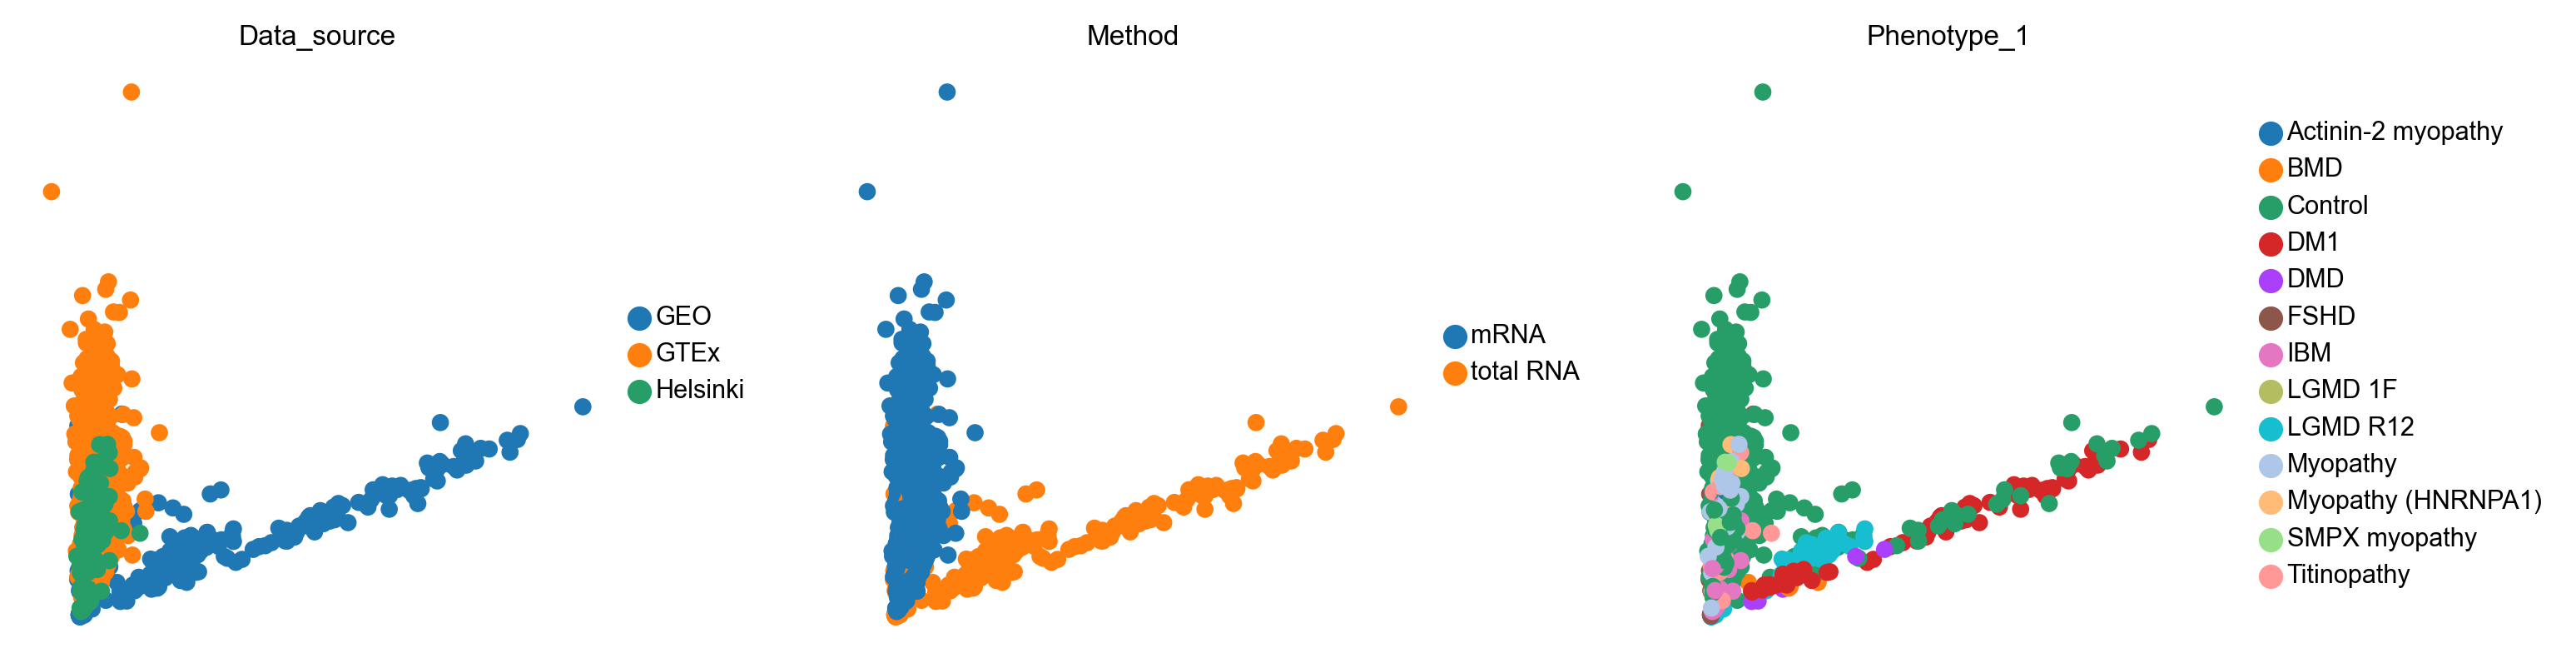

In [44]:
# raw_count

sc.set_figure_params(dpi=150, figsize=[3,3],  fontsize=8,  color_map= 'Set1',transparent=True, frameon=False)

adata_adj.X = adata_adj.layers['raw_count']

sc.pp.pca(adata_adj)
sc.pl.pca(adata_adj, color= ['Data_source',  'Method', 'Phenotype_1'])

c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


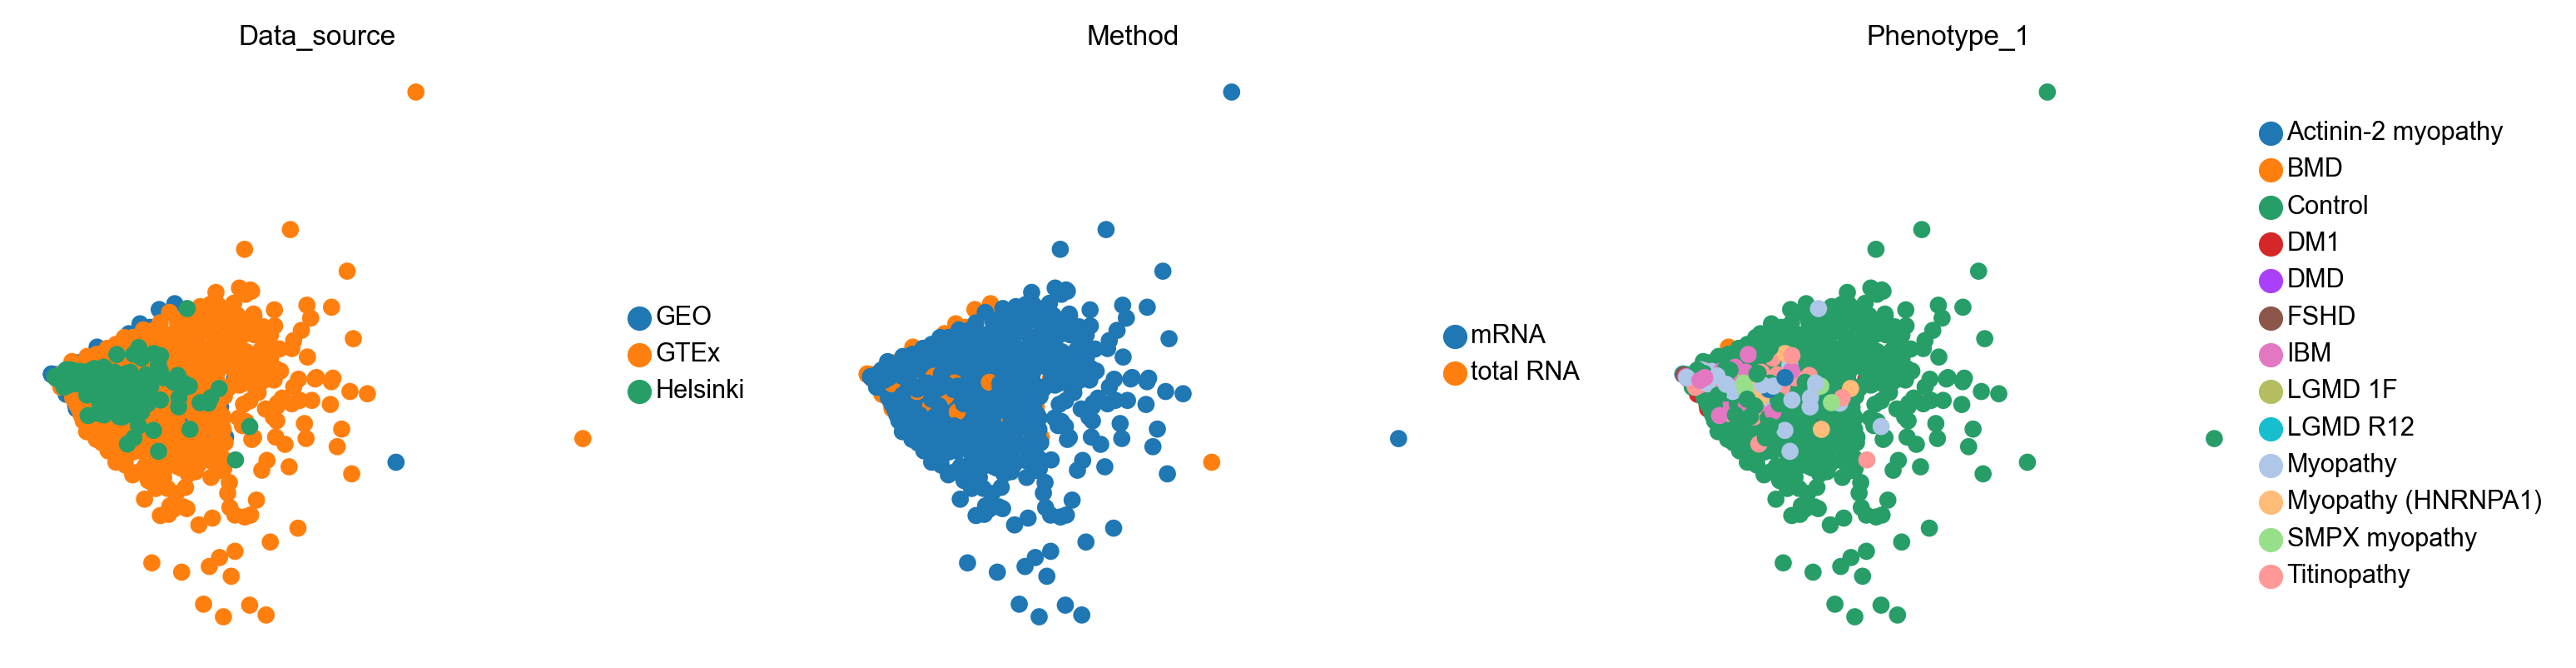

In [106]:
# combatseq_tmm

sc.set_figure_params(dpi=150, figsize=[3,3],  fontsize=8,  color_map= 'Set1',transparent=True, frameon=False)

adata_adj.X = adata_adj.layers['combatseq_tmm']

sc.pp.pca(adata_adj)
sc.pl.pca(adata_adj, color= ['Data_source',  'Method', 'Phenotype_1'])

c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


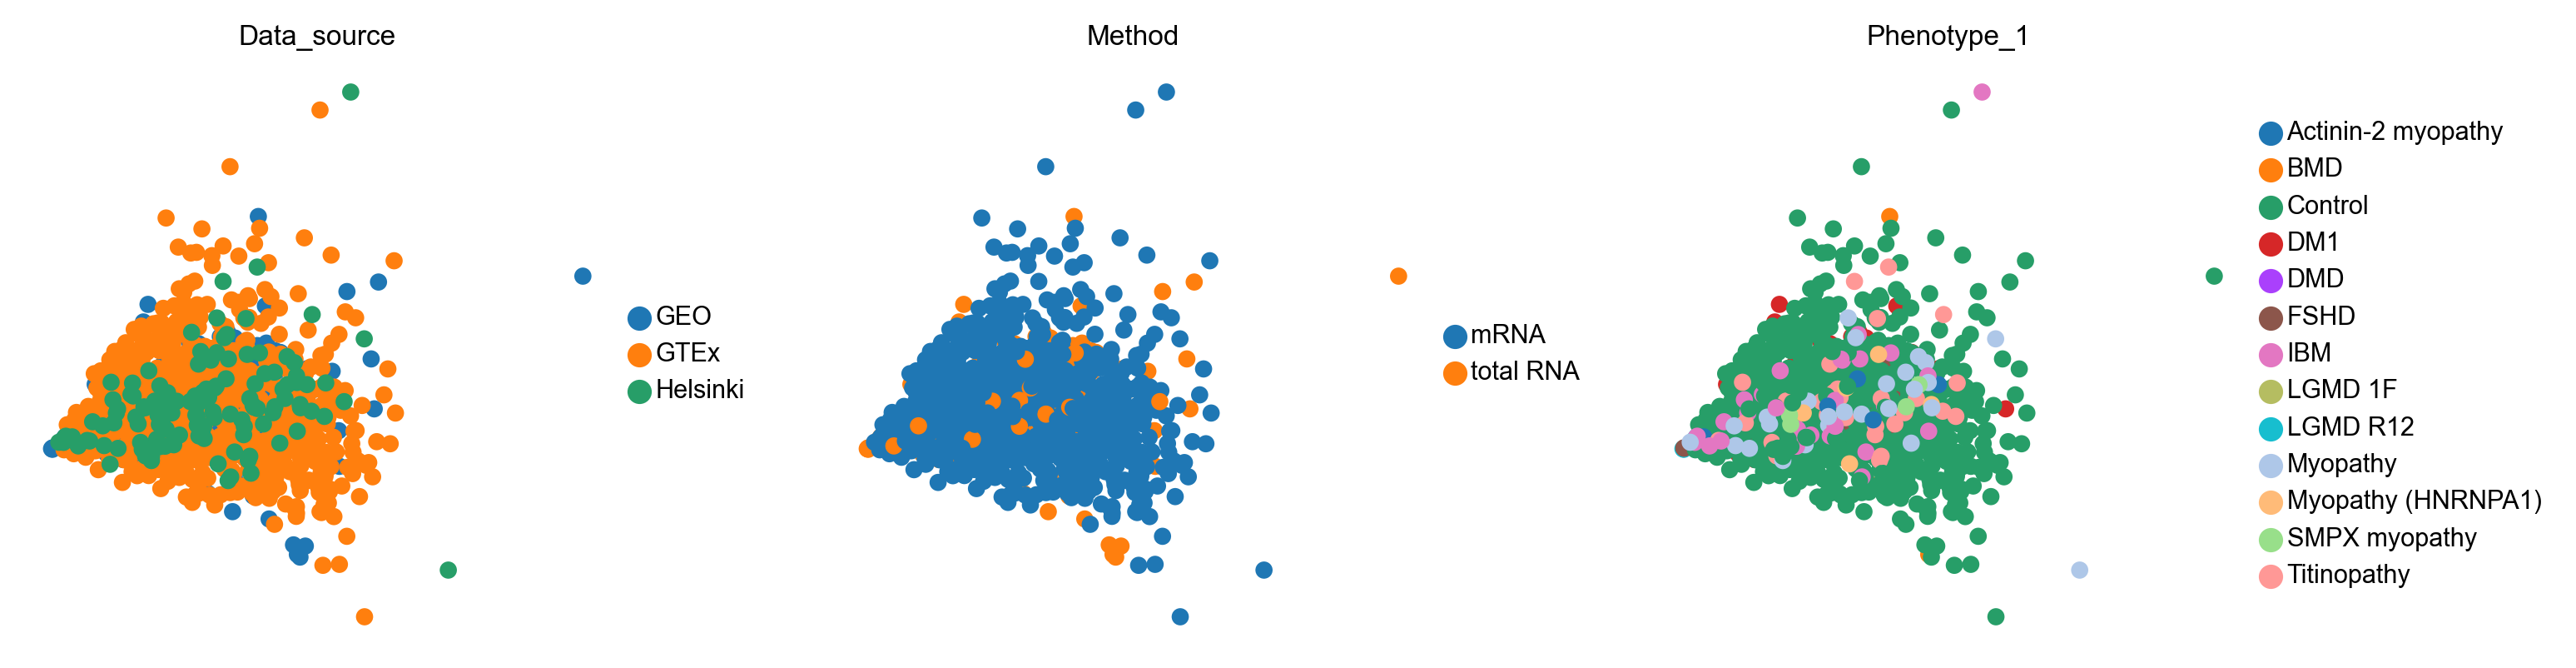

In [92]:
# edgeR

sc.set_figure_params(dpi=150, figsize=[3,3],  fontsize=8,  color_map= 'Set1',transparent=True, frameon=False)

adata_adj.X = adata_adj.layers['edgeR']

sc.pp.pca(adata_adj)
sc.pl.pca(adata_adj, color= ['Data_source',  'Method', 'Phenotype_1'])

In [52]:
adata_adj.X = adata_adj.layers["edgeR"]

# Umap

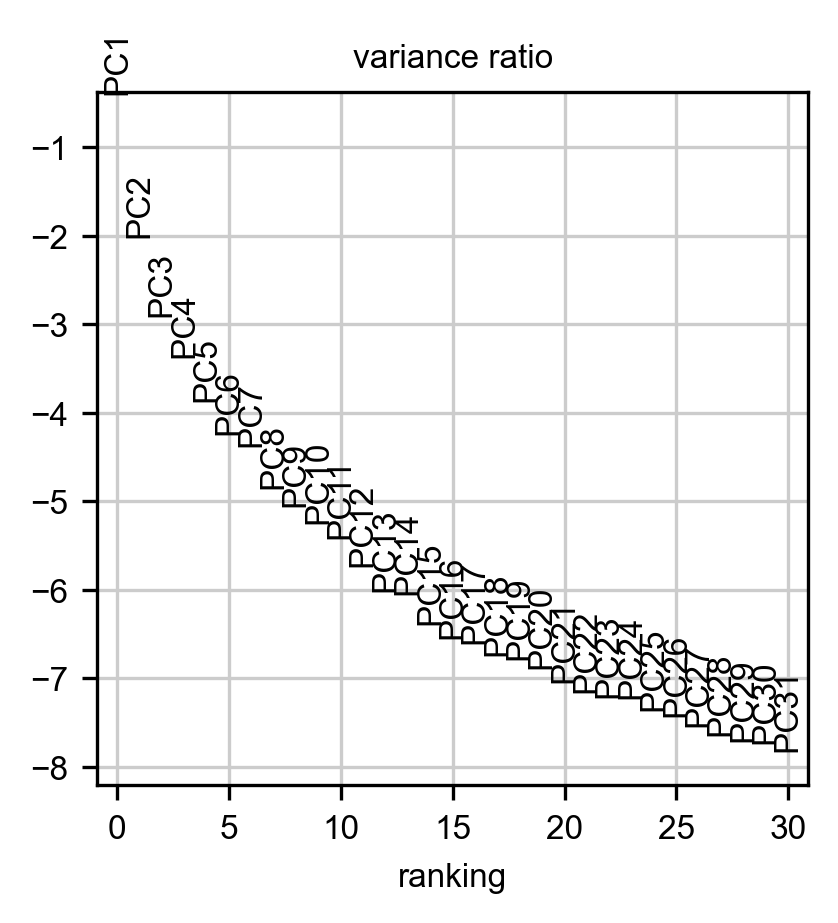

In [47]:
sc.pl.pca_variance_ratio(adata_adj, log=True)

c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


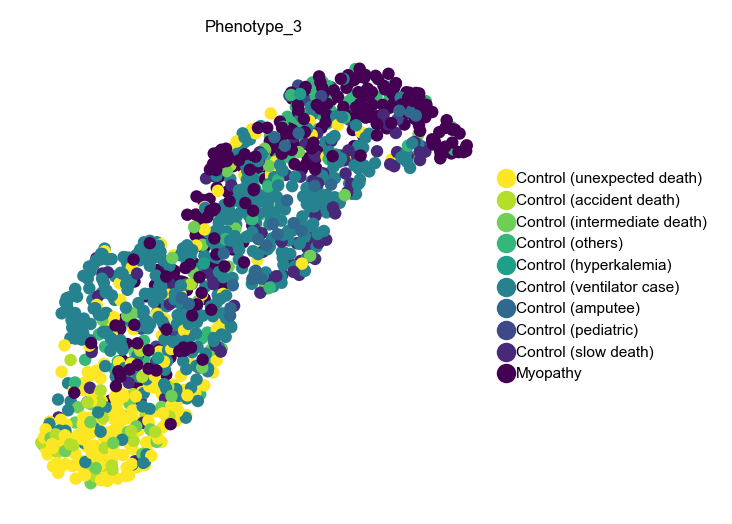

In [149]:
sc.set_figure_params(dpi=100, figsize=[3,3],  dpi_save = 300, fontsize=6,   transparent=True, frameon=False)

sc.pp.neighbors(adata_adj, n_neighbors=20, n_pcs=50)  #n_neighbors=20, n_pcs=50  n_neighbors=30, n_pcs=50
sc.tl.umap(adata_adj)
sc.pl.umap(adata_adj, color=['Phenotype_3'], size=80, ncols = 2, palette = 'viridis_r',)

c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


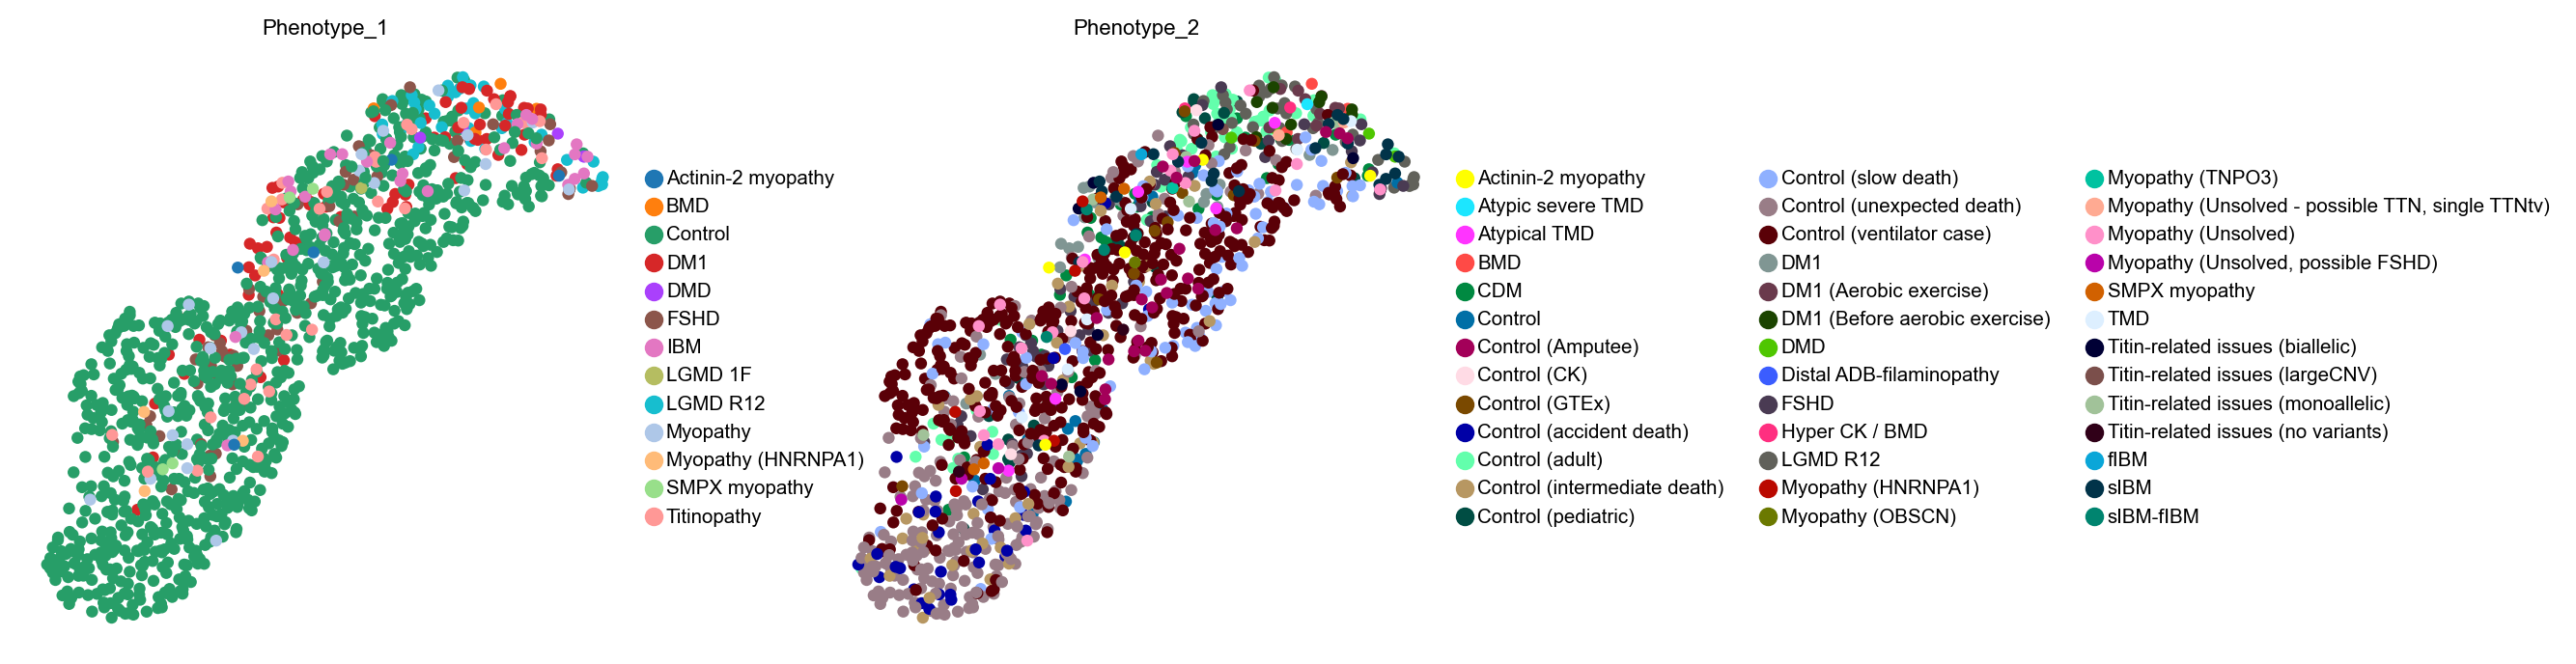

In [61]:
sc.set_figure_params(dpi=100, figsize=[4,4],  dpi_save = 300, fontsize=8,   transparent=True, frameon=False)

sc.pl.umap(adata_adj, color=[ 'Phenotype_1', 'Phenotype_2'], size=80, ncols = 2)

c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


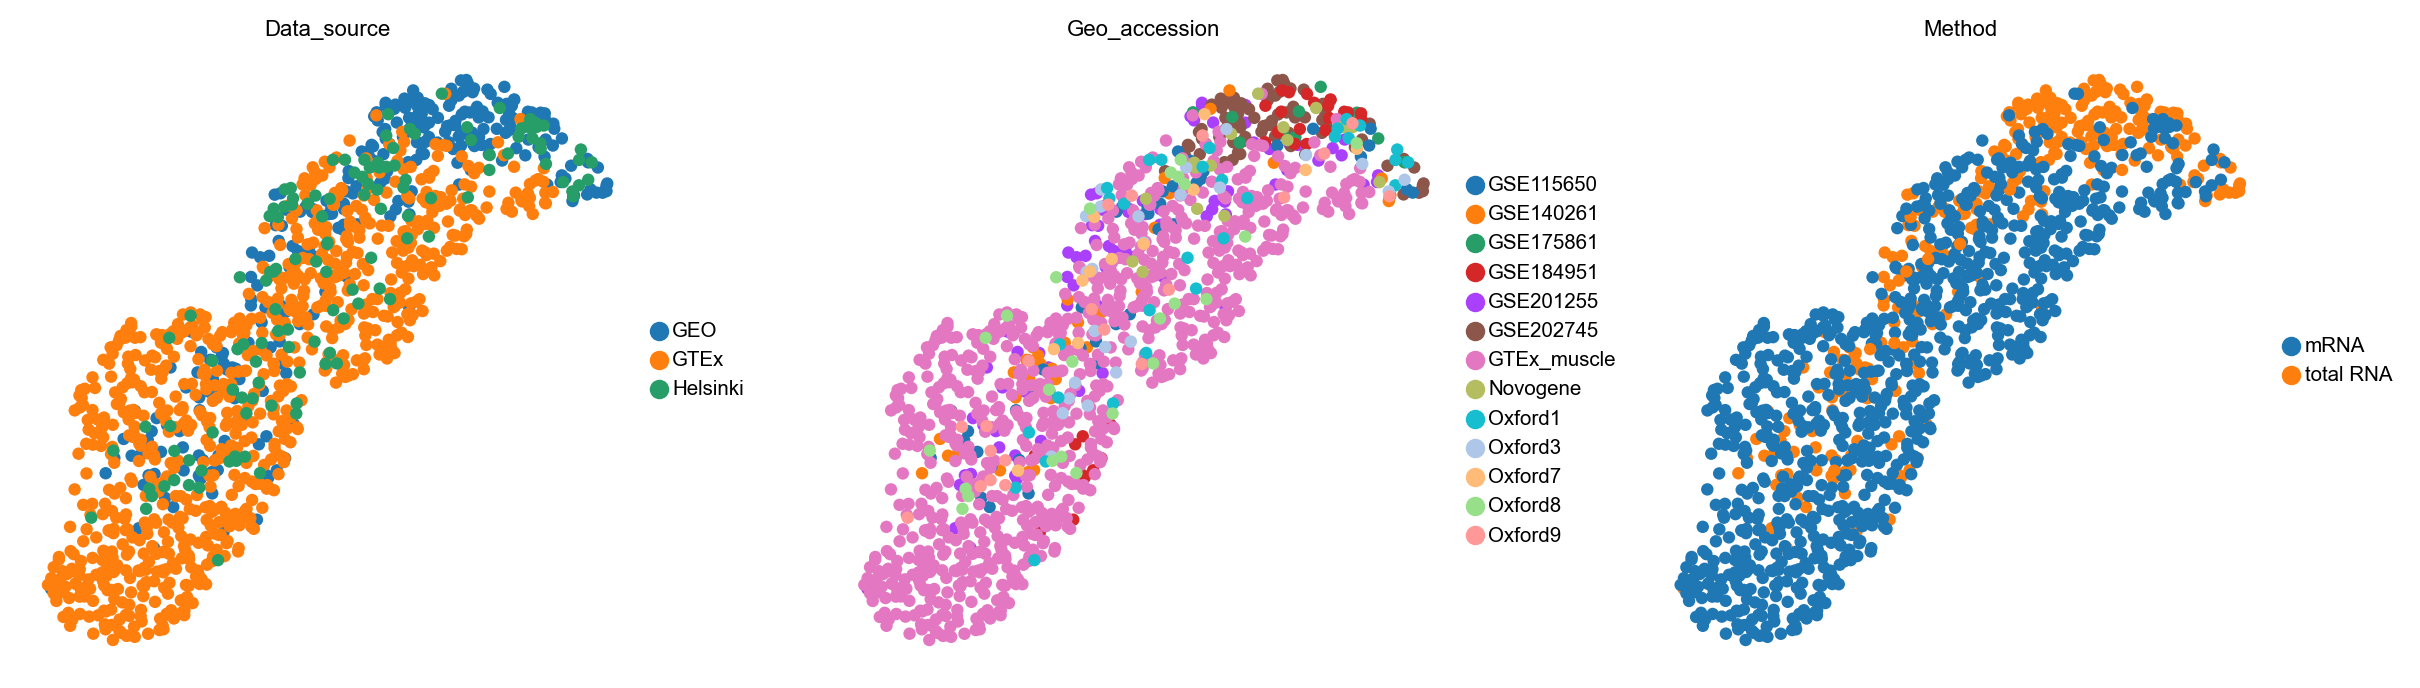

In [66]:
sc.set_figure_params(dpi=100, figsize=[4,4],  dpi_save = 300, fontsize=8,   transparent=True, frameon=False)

sc.pl.umap(adata_adj, color=['Data_source', 'Geo_accession', 'Method'], size=80, ncols = 3)

c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


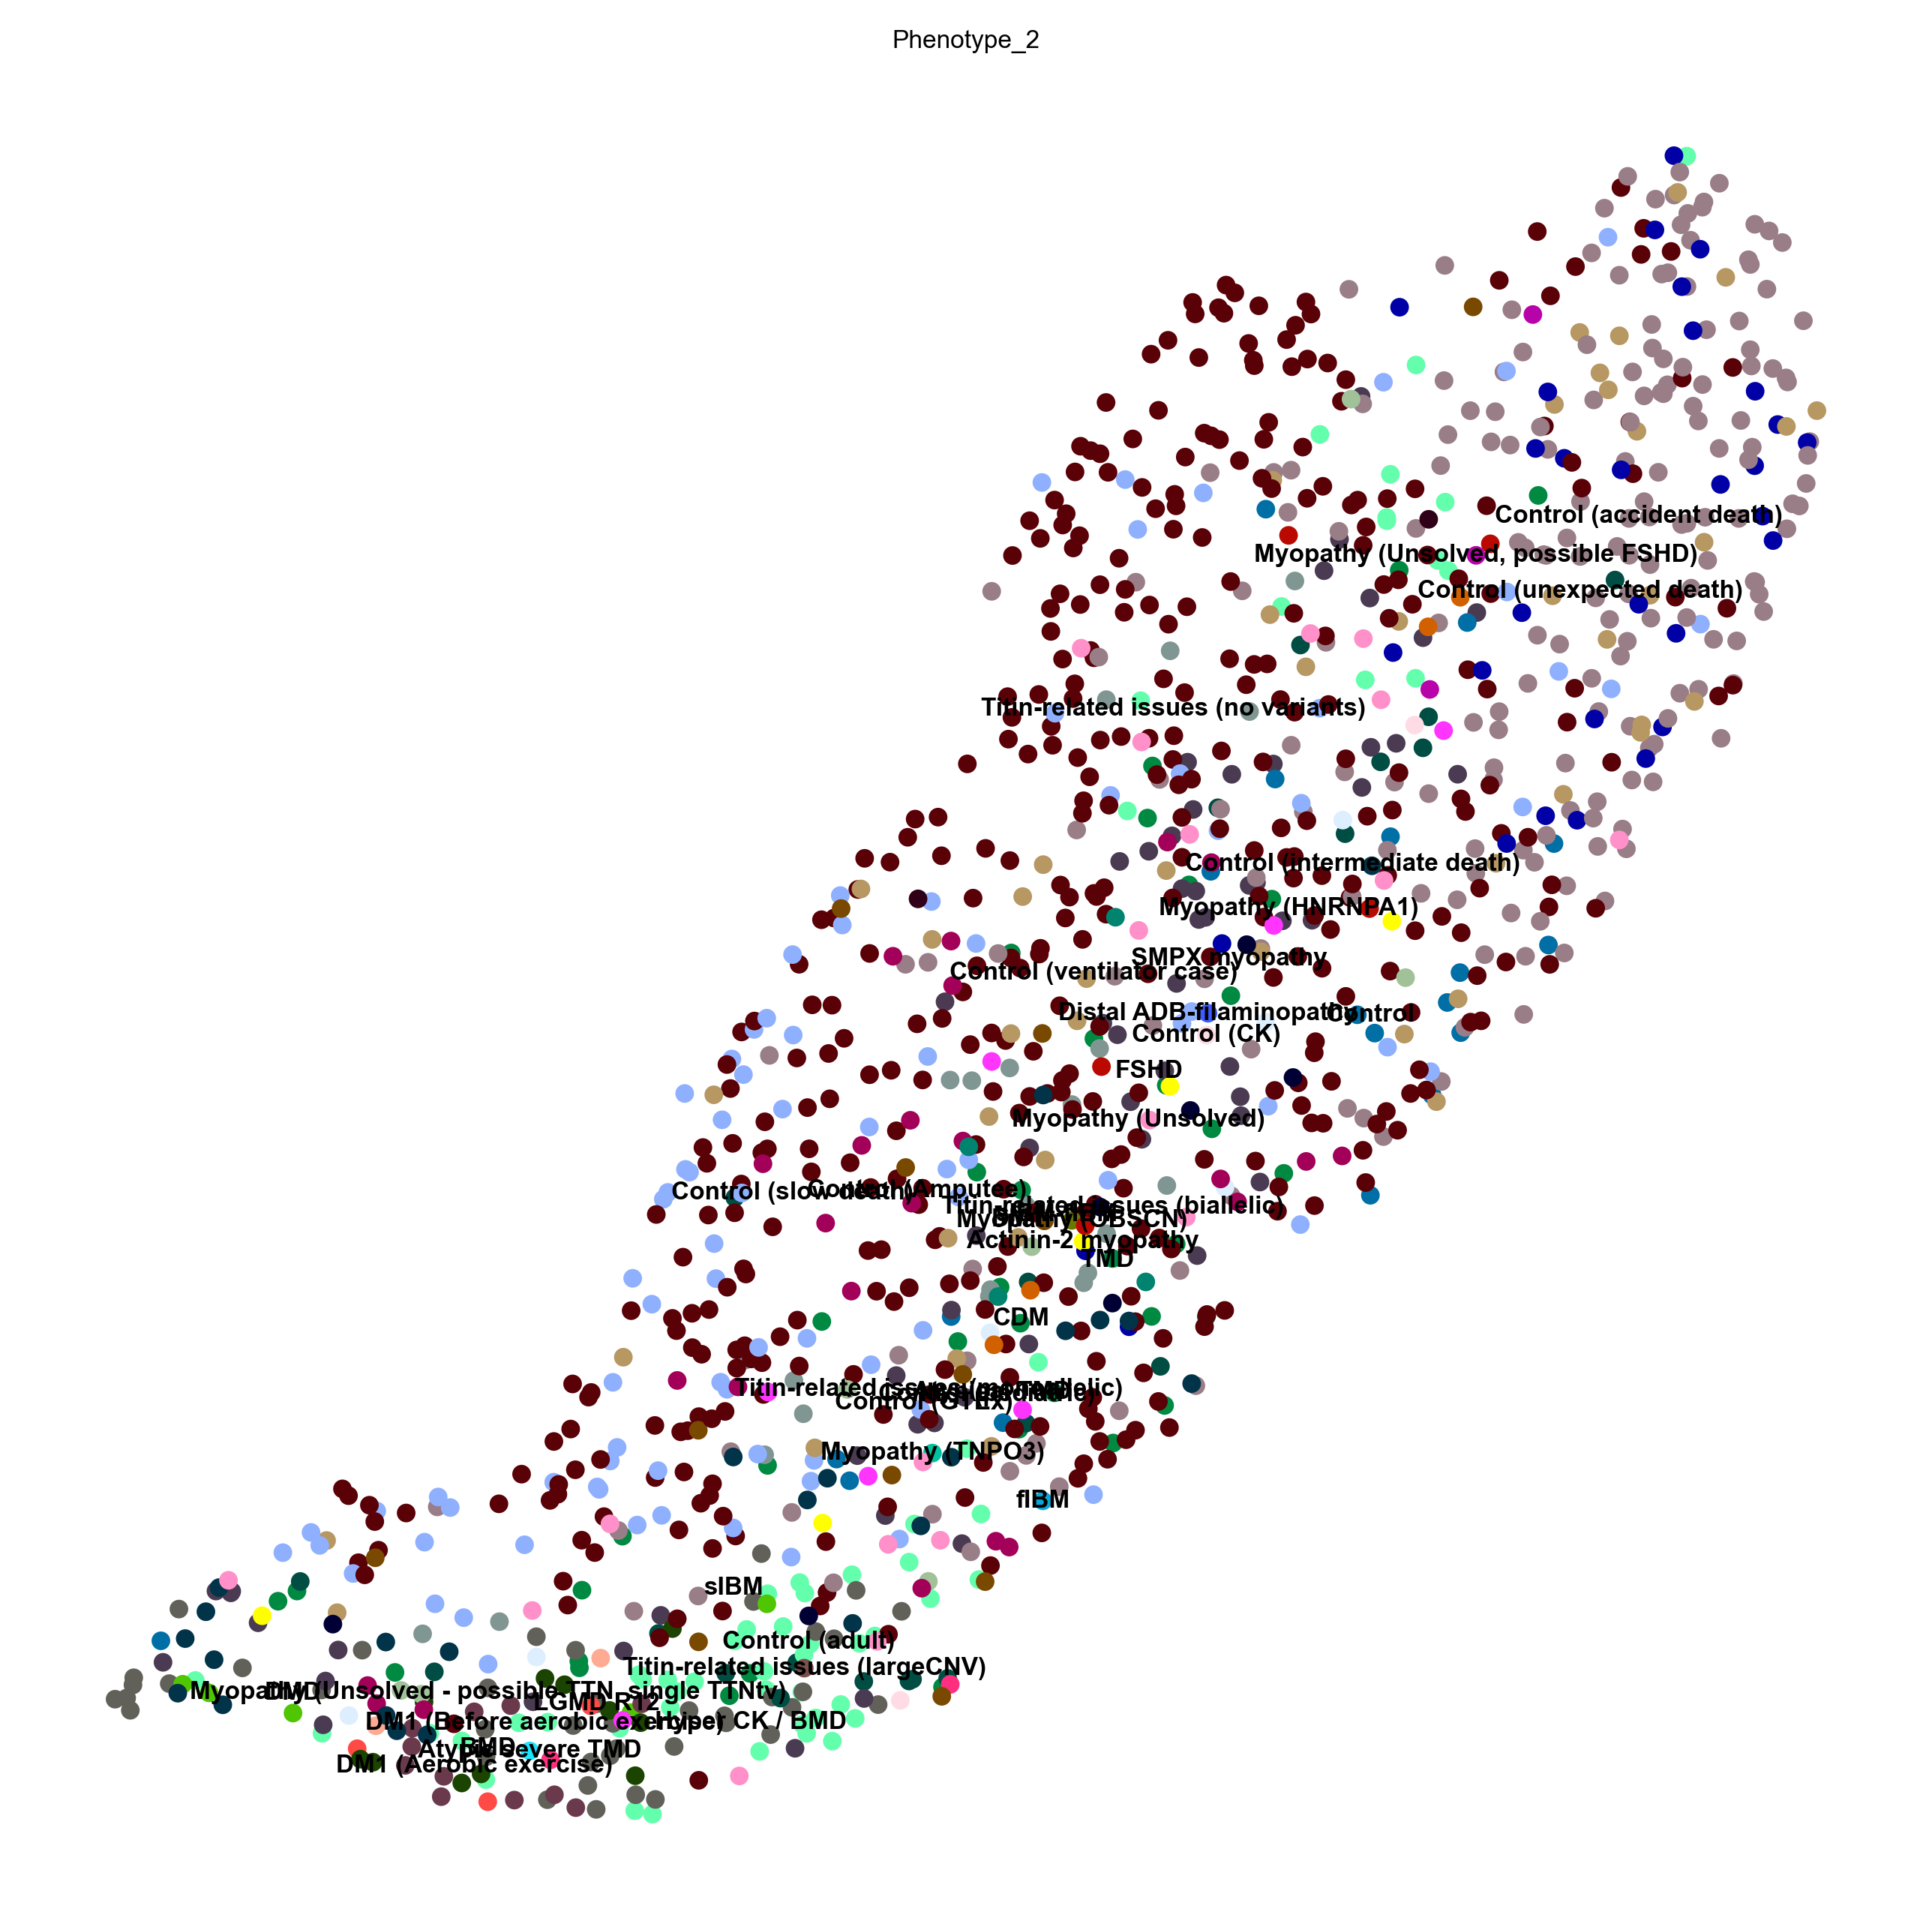

In [130]:
sc.set_figure_params(dpi=200, figsize=[8,8],  dpi_save = 300, fontsize=6,  color_map= 'viridis_r', transparent=True, frameon=False)

sc.pl.umap(adata_adj, color=[ 'Phenotype_2'], size=80, ncols = 2, legend_loc = 'on data')

c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
meta NOT subset; don't know how to subset; dropped


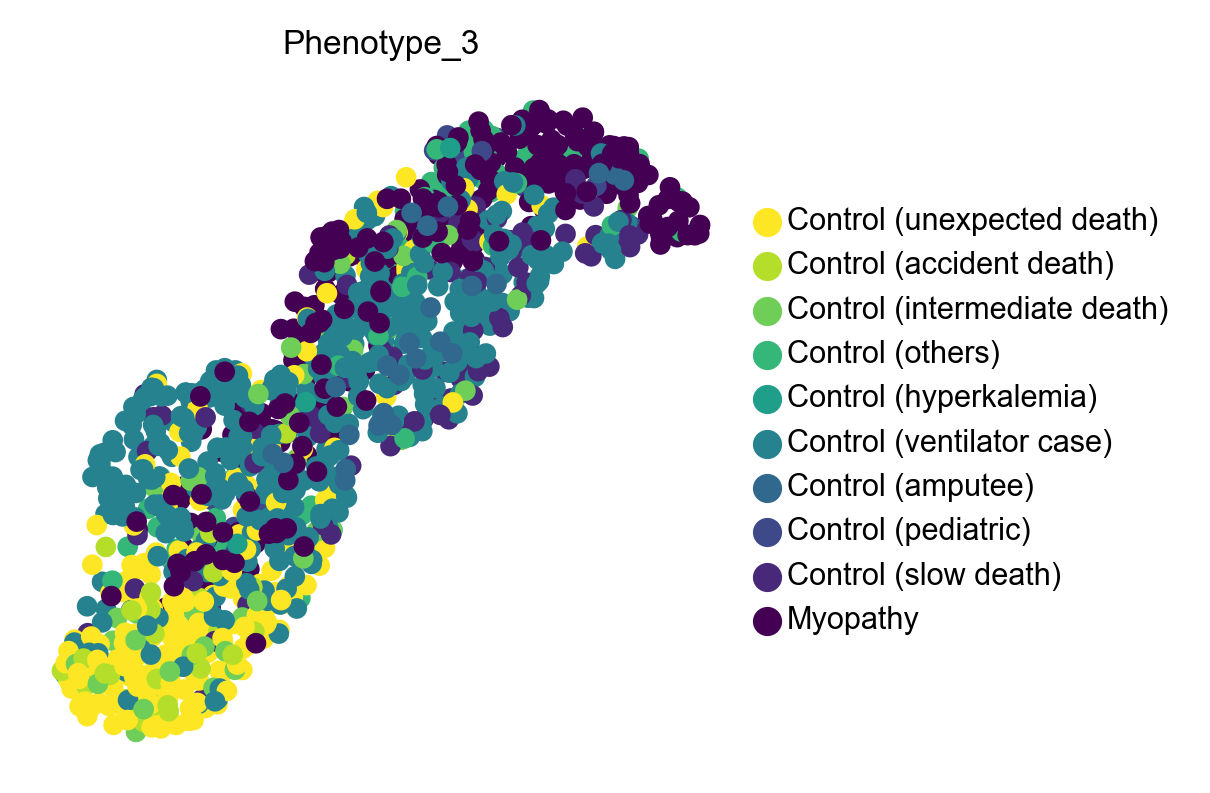

In [68]:
sc.set_figure_params(dpi=150, figsize=[3,3],  dpi_save = 300, fontsize=8,  color_map= 'viridis_r', transparent=True, frameon=False)

sc.pl.umap(adata_adj, color = ['Phenotype_3'], palette = 'viridis_r', save='Gradual change.pdf') #

## Inferring from GTEx controls

c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
meta NOT subset; don't know how to subset; dropped


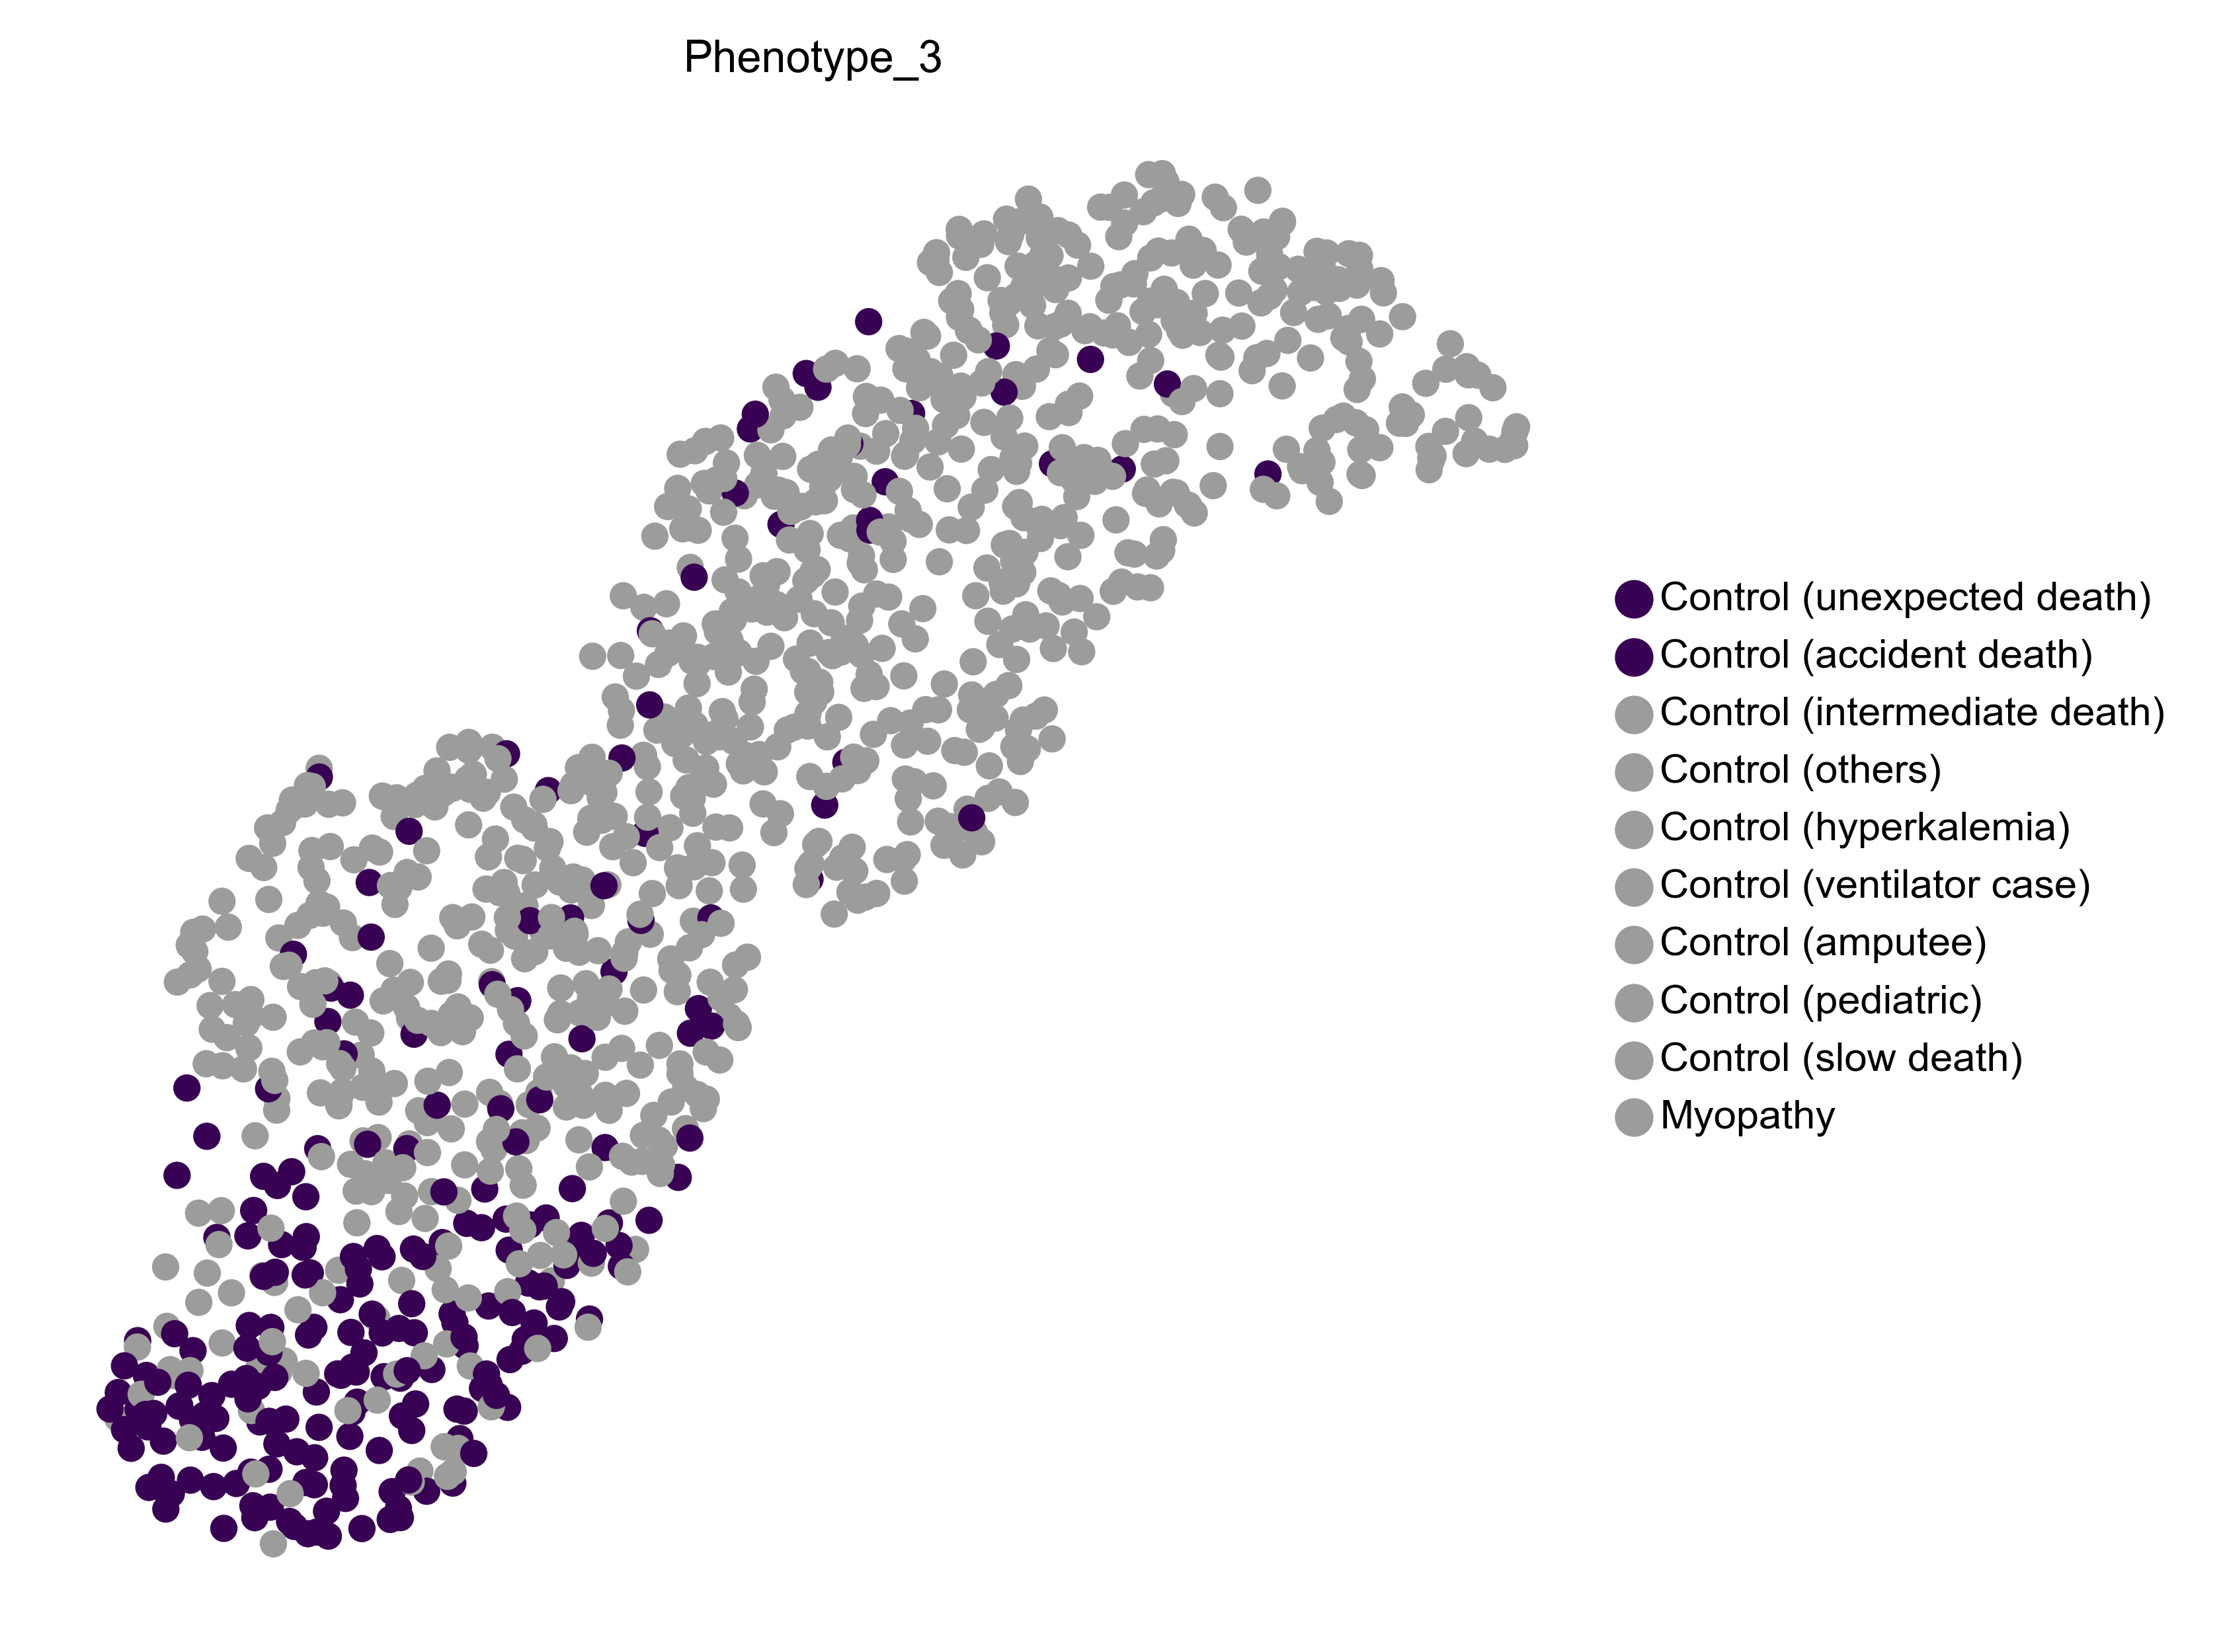

In [69]:
sc.set_figure_params(dpi=300, dpi_save = 300,figsize=[5,5],  fontsize=8,  color_map= 'viridis_r',transparent=True, frameon=False)

sc.pl.umap(adata_adj, color = 'Phenotype_3', palette ={
        "Control (unexpected death)": "#390153",
        "Control (accident death)": "#390153",
        "Control (intermediate death)": '#9c9c9b',
        "Control (ventilator case)": "#9c9c9b",
        "Control (slow death)": "#9c9c9b",
        "Control (amputee)": "#9c9c9b",
        "Control (hyperkalemia)": "#9c9c9b",
        "Control (pediatric)": "#9c9c9b",
        "Control (others)": "#9c9c9b",
        "Myopathy": "#9c9c9b",
    }, legend_loc = 'right margin', save='1_accendentdeath.pdf')

c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
meta NOT subset; don't know how to subset; dropped


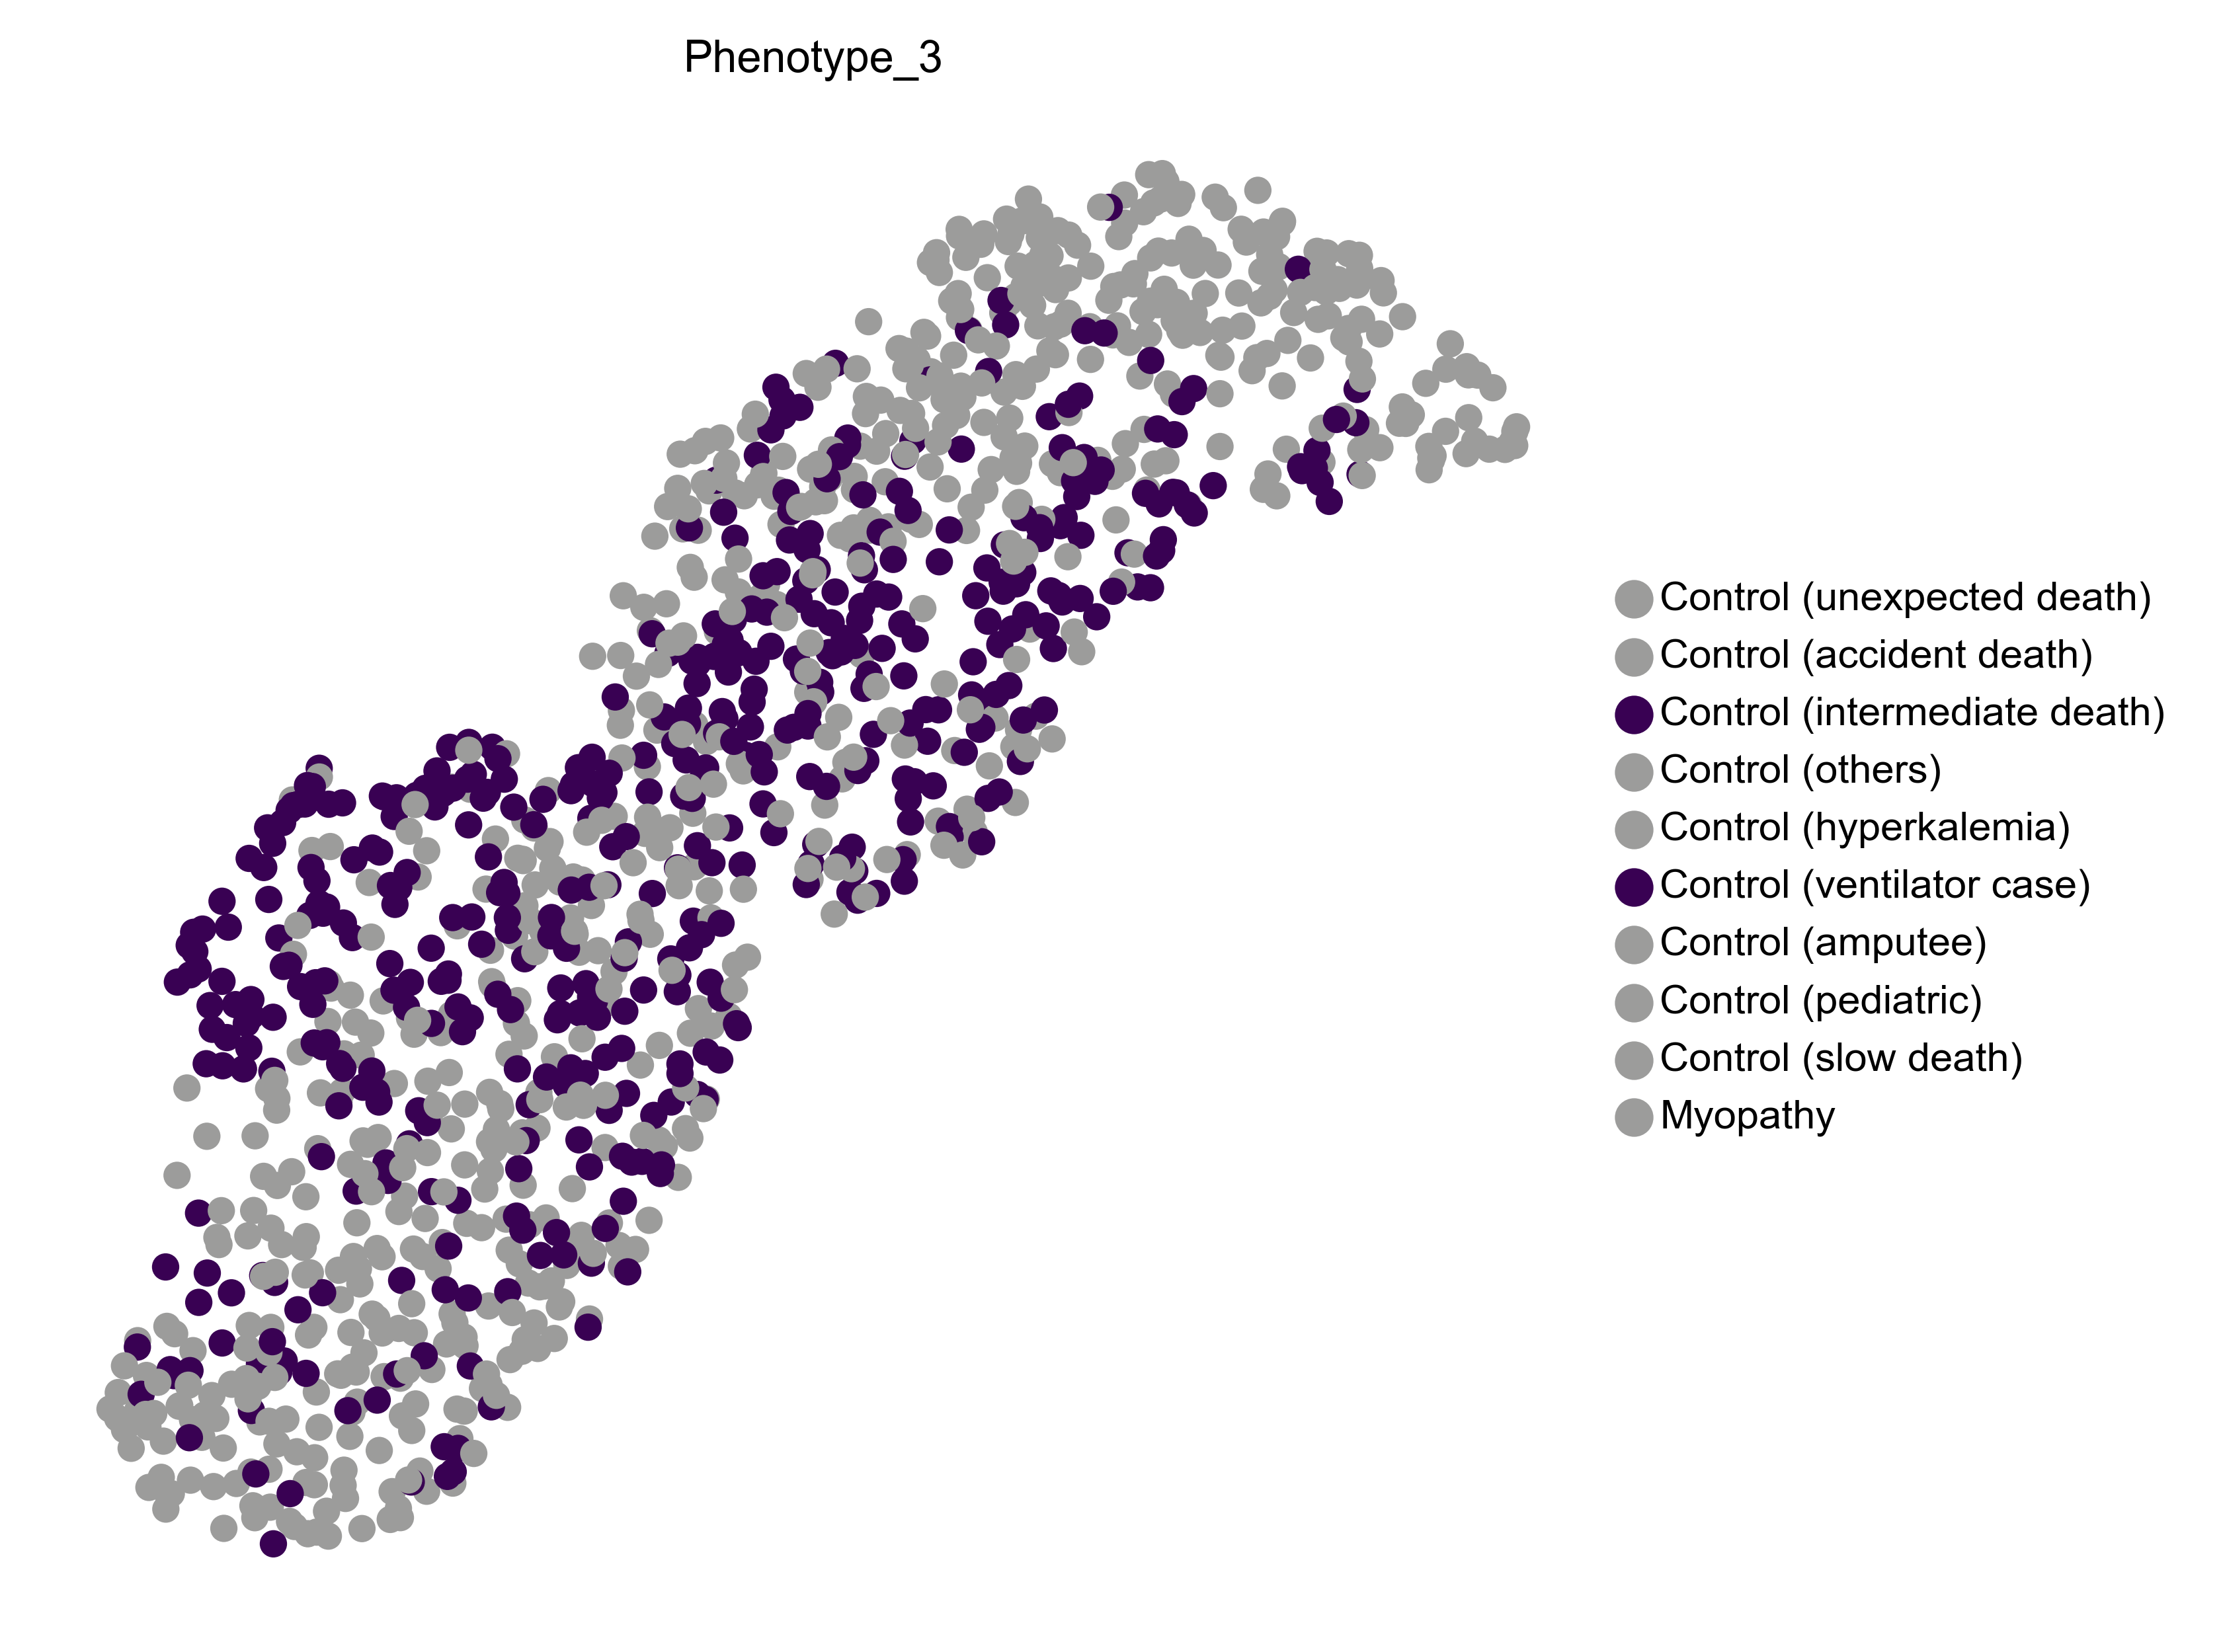

In [70]:
sc.set_figure_params(dpi=300, dpi_save = 300,figsize=[5,5],  fontsize=8,  color_map= 'viridis_r',transparent=True, frameon=False)

sc.pl.umap(adata_adj, color = 'Phenotype_3', palette ={
        "Control (unexpected death)": "#9c9c9b",
        "Control (accident death)": "#9c9c9b",
        "Control (intermediate death)": '#390153',
        "Control (ventilator case)": "#390153",
        "Control (slow death)": "#9c9c9b",
        "Control (amputee)": "#9c9c9b",
        "Control (hyperkalemia)": "#9c9c9b",
        "Control (pediatric)": "#9c9c9b",
        "Control (others)": "#9c9c9b",
        "Myopathy": "#9c9c9b",
    }, legend_loc = 'right margin', save='2_intermediatedeath.pdf')

c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
meta NOT subset; don't know how to subset; dropped


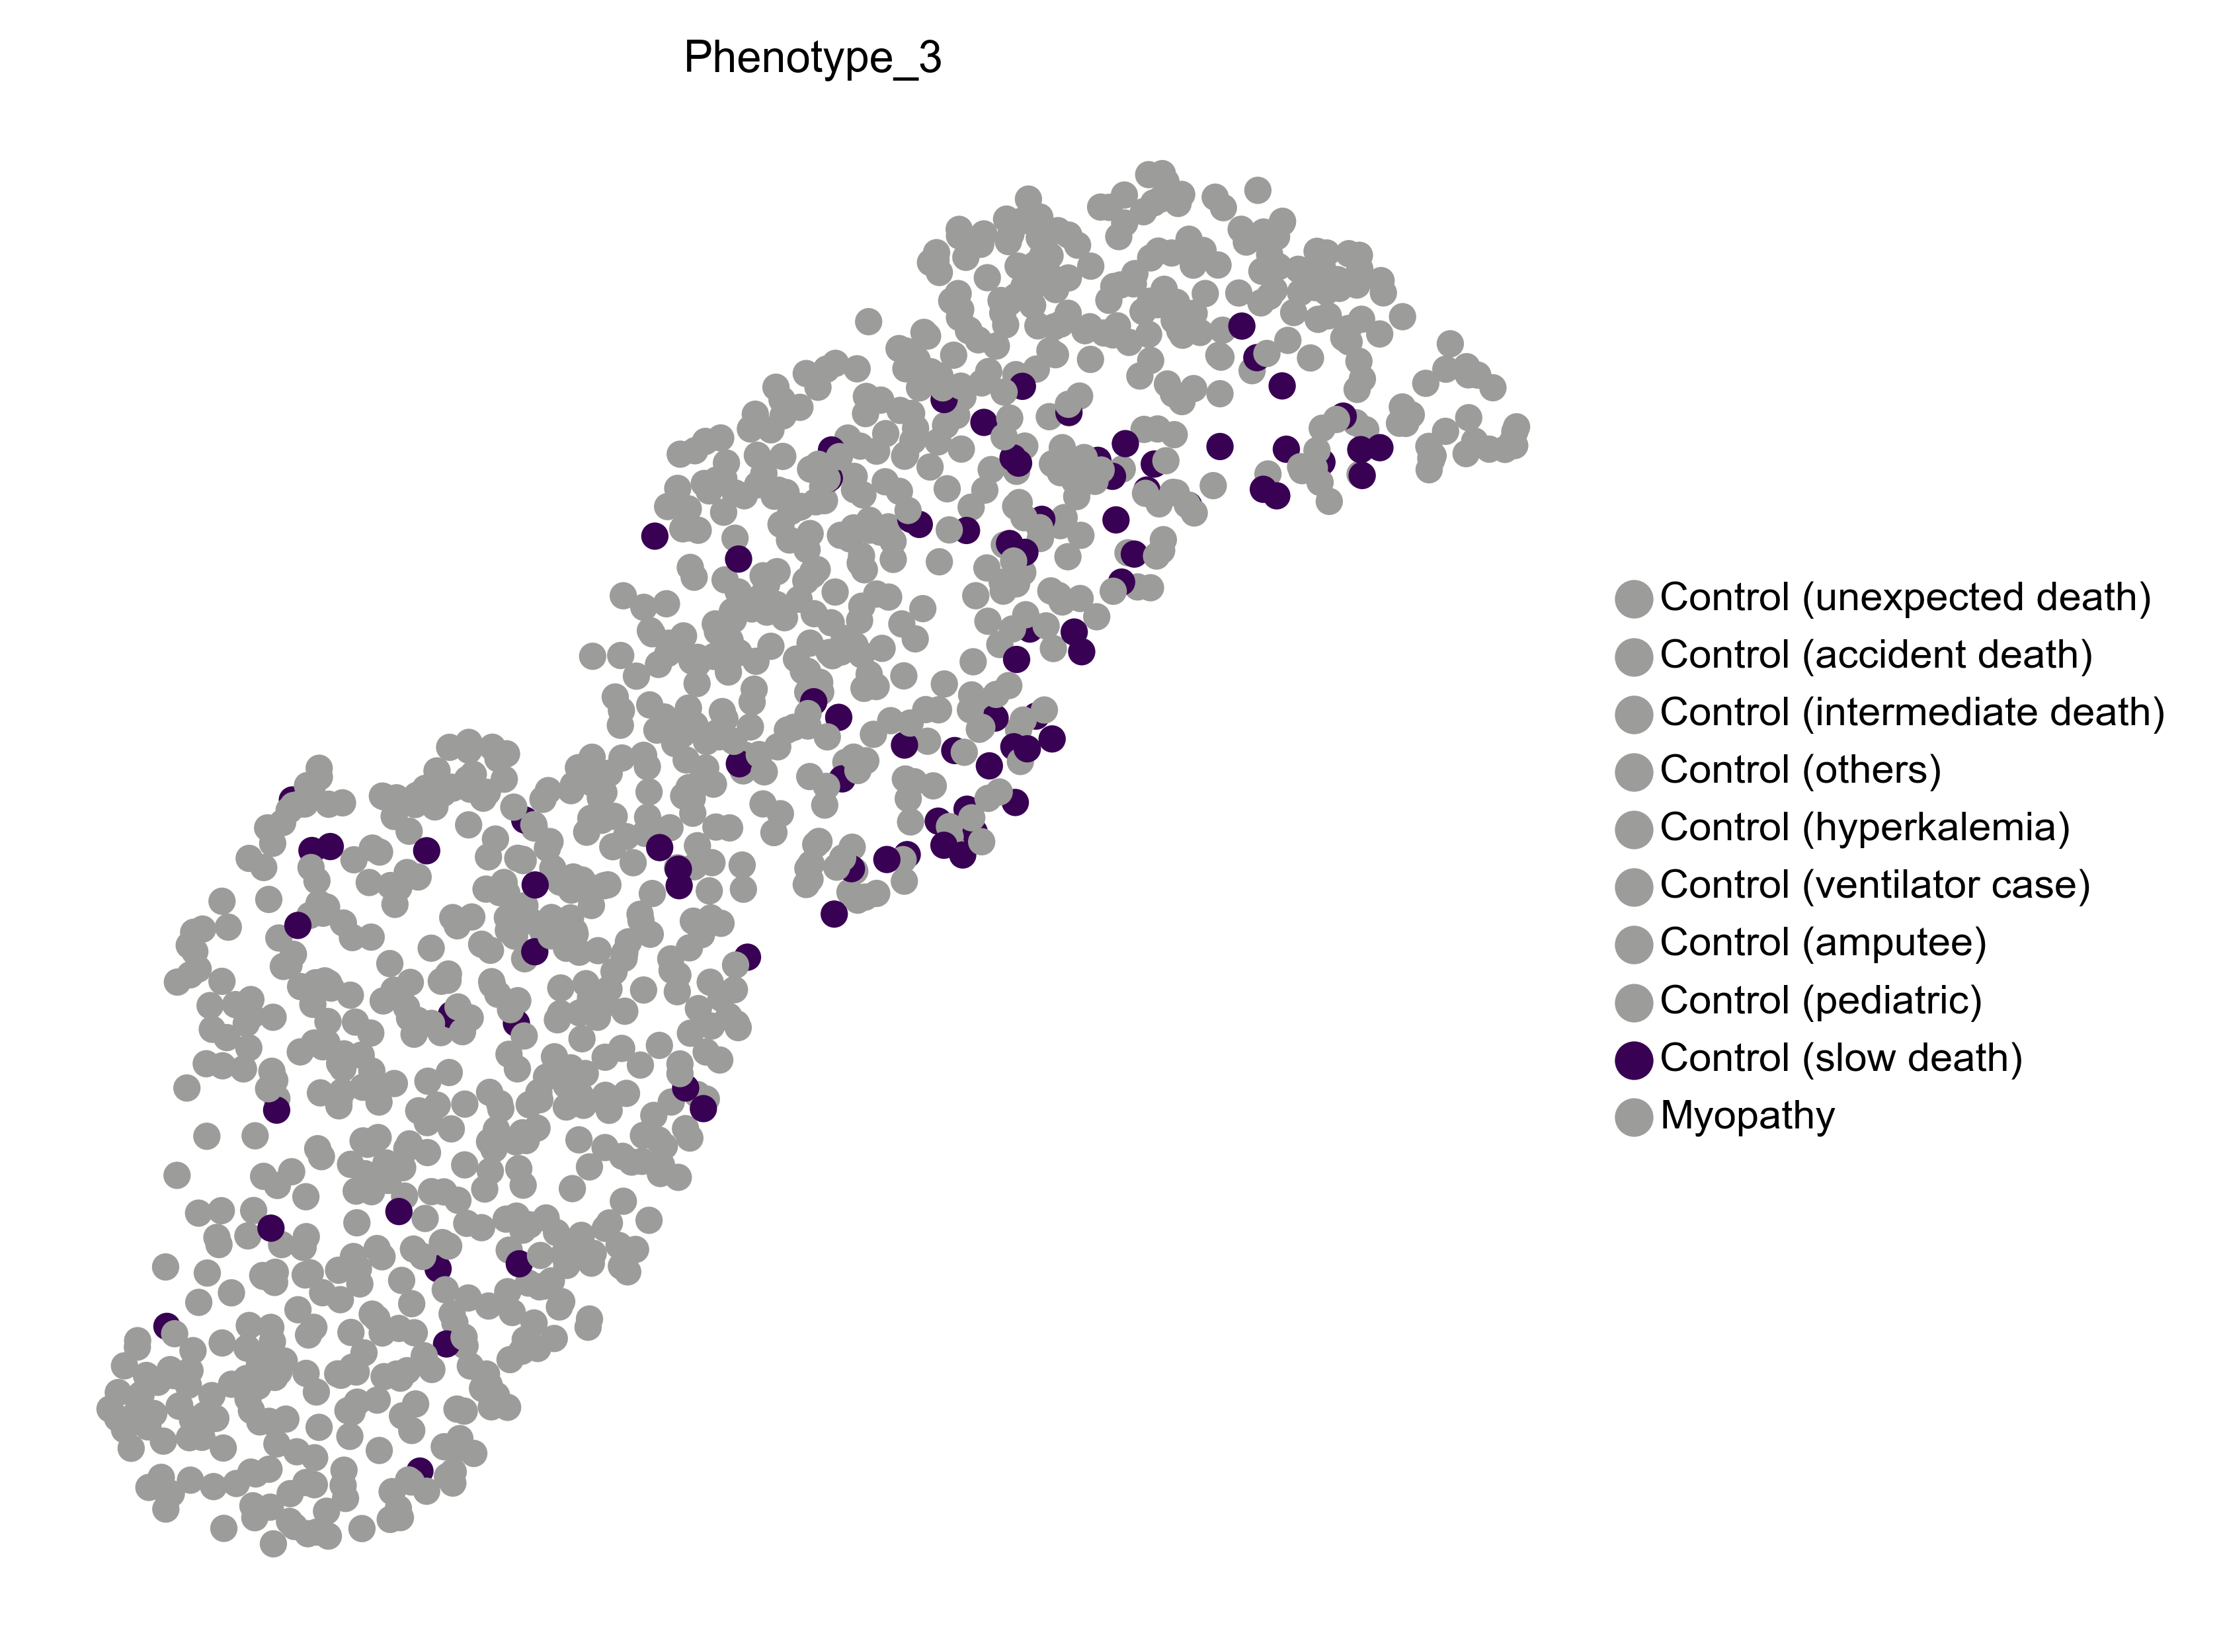

In [71]:
sc.set_figure_params(dpi=300, dpi_save = 300,figsize=[5,5],  fontsize=8,  color_map= 'viridis_r',transparent=True, frameon=False)

sc.pl.umap(adata_adj, color = 'Phenotype_3', palette ={
        "Control (unexpected death)": "#9c9c9b",
        "Control (accident death)": "#9c9c9b",
        "Control (intermediate death)": '#9c9c9b',
        "Control (ventilator case)": "#9c9c9b",
        "Control (slow death)": "#390153",
        "Control (amputee)": "#9c9c9b",
        "Control (hyperkalemia)": "#9c9c9b",
        "Control (pediatric)": "#9c9c9b",
        "Control (others)": "#9c9c9b",
        "Myopathy": "#9c9c9b",
    }, legend_loc = 'right margin', save='3_slowdeath.pdf')

c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
meta NOT subset; don't know how to subset; dropped


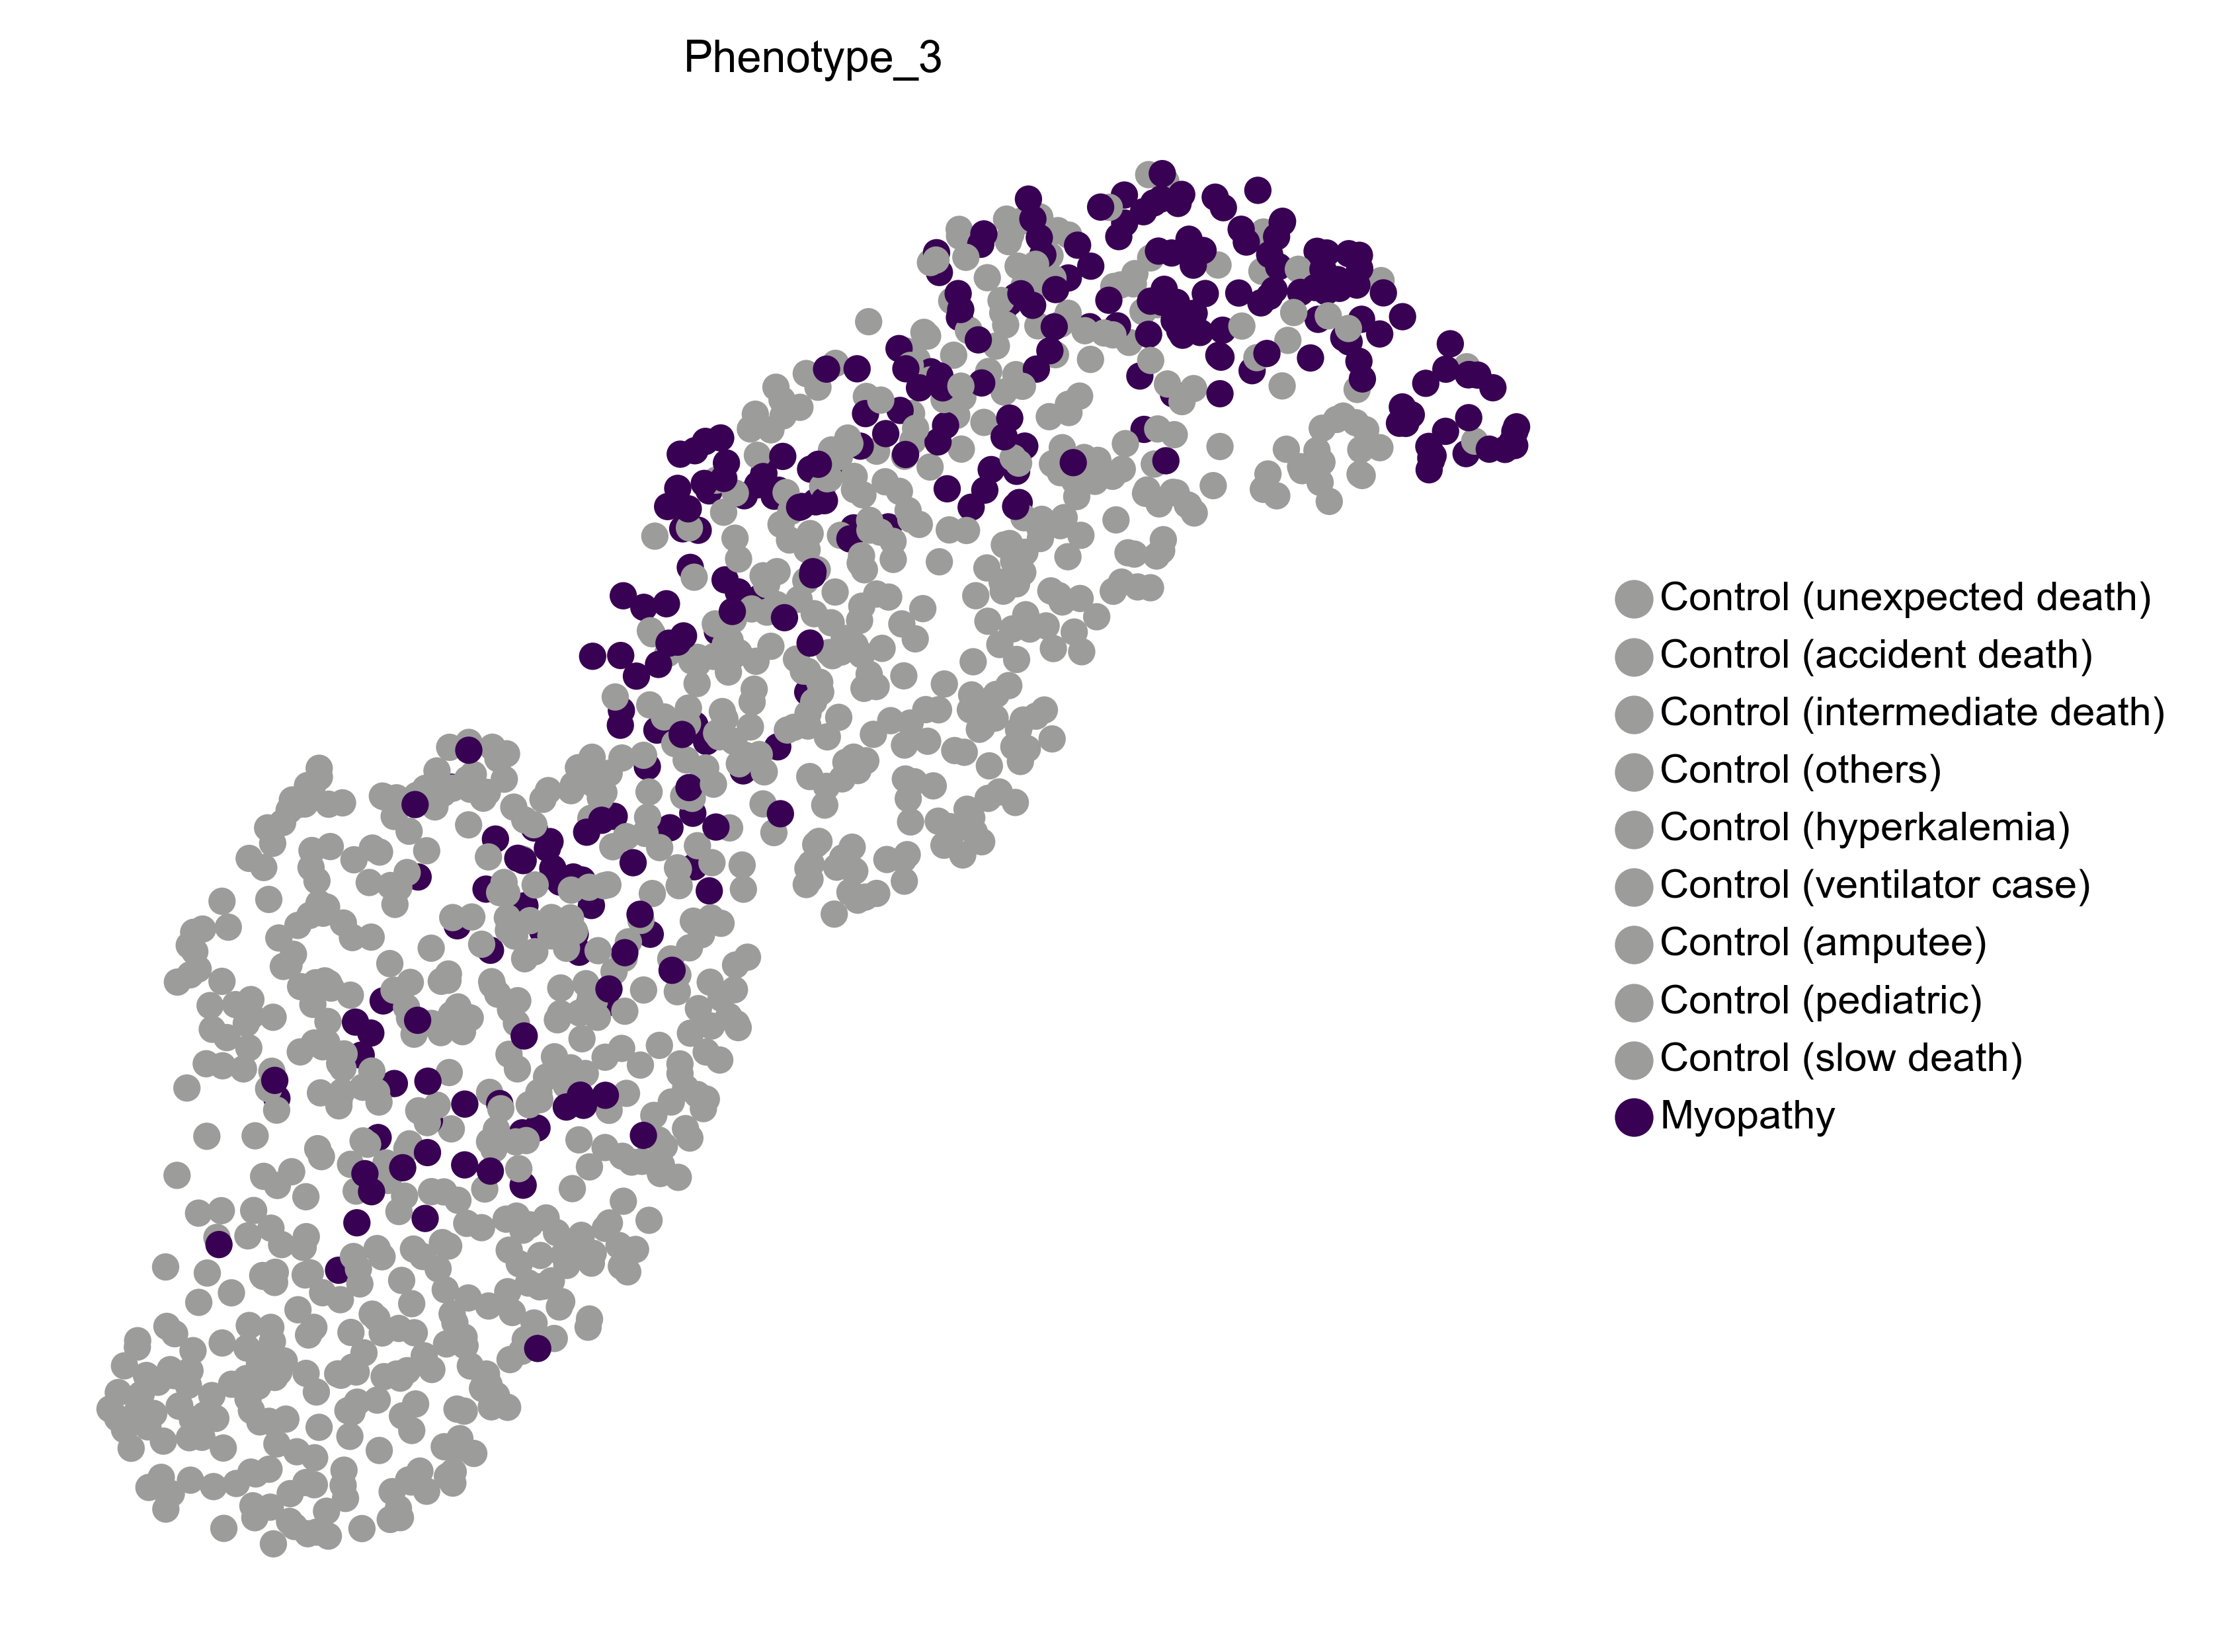

In [72]:
sc.set_figure_params(dpi=300, dpi_save = 300,figsize=[5,5],  fontsize=8,  color_map= 'viridis_r',transparent=True, frameon=False)

sc.pl.umap(adata_adj, color = 'Phenotype_3', palette ={
        "Control (unexpected death)": "#9c9c9b",
        "Control (accident death)": "#9c9c9b",
        "Control (intermediate death)": '#9c9c9b',
        "Control (ventilator case)": "#9c9c9b",
        "Control (slow death)": "#9c9c9b",
        "Control (amputee)": "#9c9c9b",
        "Control (hyperkalemia)": "#9c9c9b",
        "Control (pediatric)": "#9c9c9b",
        "Control (others)": "#9c9c9b",
        "Myopathy": "#390153", ##
    }, legend_loc = 'right margin', save='4_myopathy.pdf')

c:\Users\cpres\.conda\envs\Scanpy\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


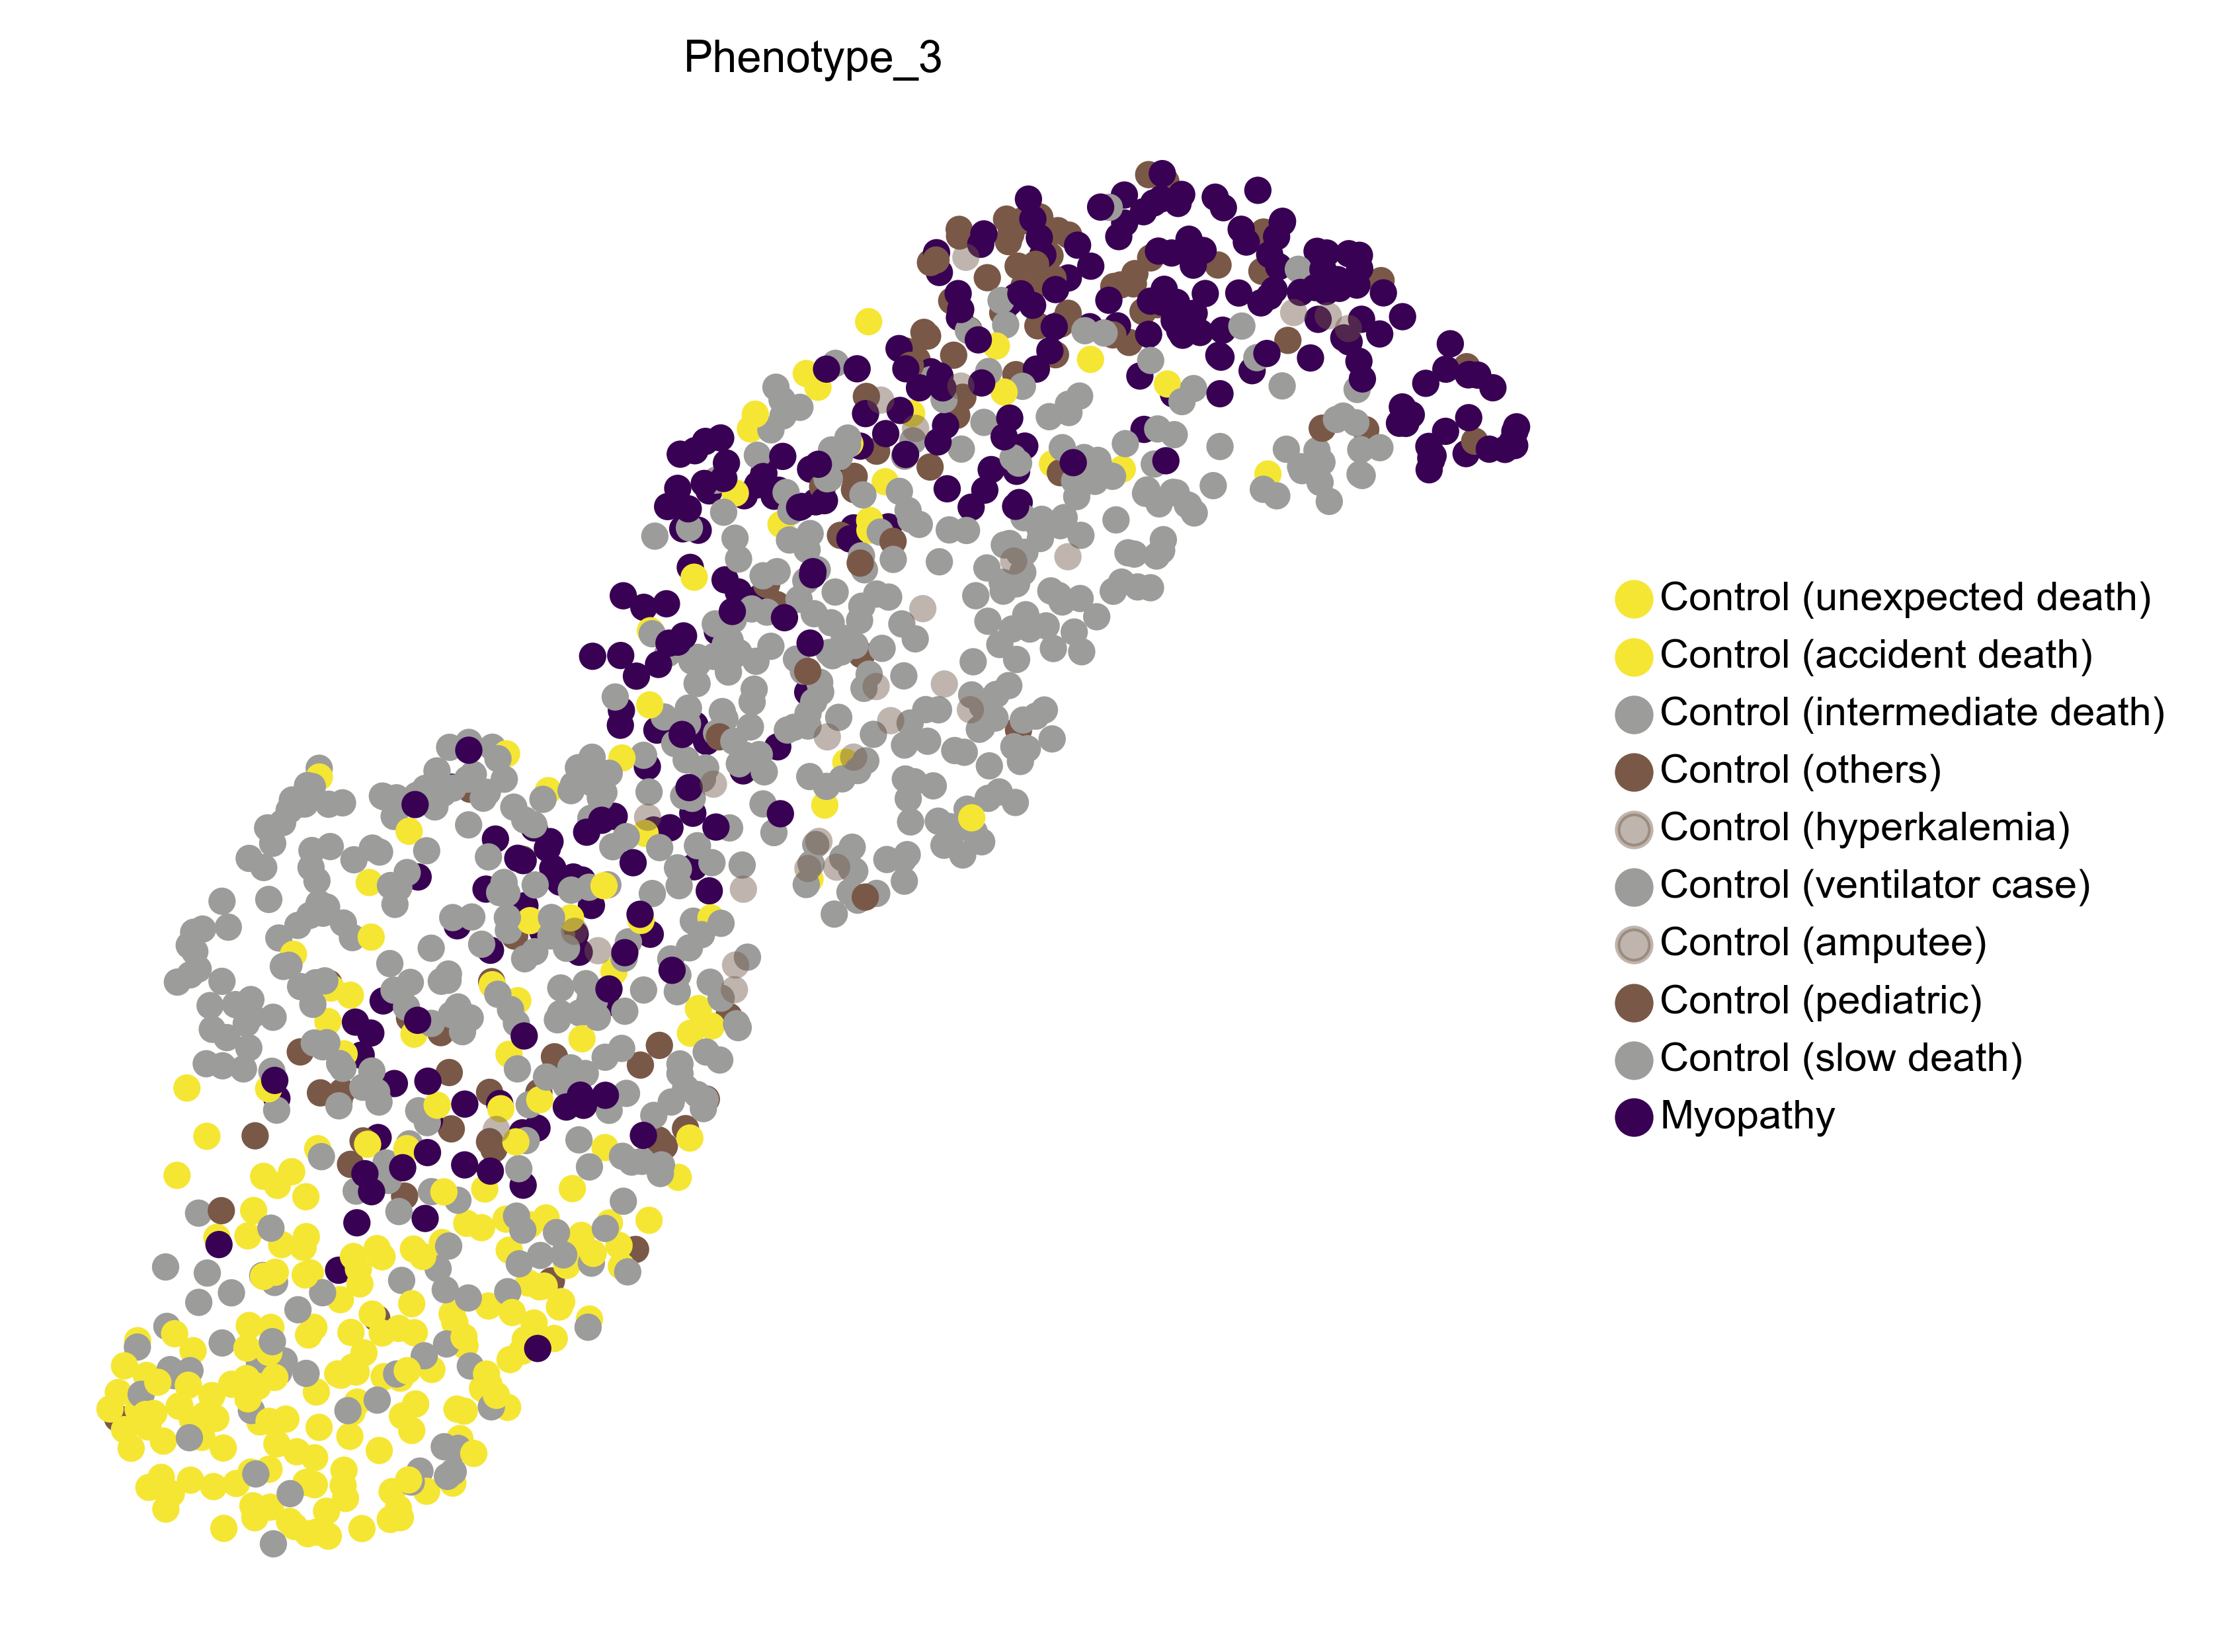

In [6]:
# GEO control, Helsinki control, Unprecedented control

sc.set_figure_params(dpi=300, dpi_save = 300,figsize=[5,5],  fontsize=8,  color_map= 'viridis_r',transparent=True, frameon=False)

sc.pl.umap(adata_adj, color = 'Phenotype_3', palette ={
        "Control (unexpected death)": "#f5e634",
        "Control (accident death)": "#f5e634",
        "Control (intermediate death)": '#9c9c9b',
        "Control (ventilator case)": "#9c9c9b",
        "Control (slow death)": "#9c9c9b",
        "Control (amputee)": "#70584770",
        "Control (hyperkalemia)": "#70584770",
        "Control (pediatric)": "#7A5847",
        "Control (others)": "#7A5847",
        "Myopathy": "#390153", ##
    }, legend_loc = 'right margin', save='5_myopathy.pdf')
